In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
%pylab inline
import re

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx')

In [6]:
def extract_components(material):
    match = re.match(r"Mn1([A-Za-z]+)1([A-Za-z]+)4([A-Za-z]+)8_([A-Za-z]+)4([A-Za-z]+)6", material)
    if match:
        A2, B1, X1, B2, X2 = match.groups()
        return A2, B1, X1, B2, X2
    return None, None, None, None, None

In [7]:
df[['A2_site', 'B1_site', 'X1_site', 'B2_site', 'X2_site']] = df['material'].apply(lambda m: pd.Series(extract_components(m)))

In [8]:
df

material           MBT      BT spin_state  Ef_per_cell  \
0    Mn1Sc1Bi4Se8_Sn4Te6  Mn1Sc1Bi4Se8  Sn4Te6         FM    -7.705674   
1     Mn1Y1Sb4Se8_Sn4Te6   Mn1Y1Sb4Se8  Sn4Te6         FM    -7.379554   
2    Mn1Ag1Sb4Te8_Sn4Te6  Mn1Ag1Sb4Te8  Sn4Te6         FM    -4.856966   
3     Mn1Rh1Sb4S8_Sn4Se6   Mn1Rh1Sb4S8  Sn4Se6        AFM    -6.882650   
4    Mn1Zr1Pb4Te8_Sb4Te6  Mn1Zr1Pb4Te8  Sb4Te6         FM    -6.439024   
..                   ...           ...     ...        ...          ...   
343  Mn1Cd1Sb4Te8_Sb4Te6  Mn1Cd1Sb4Te8  Sb4Te6         FM    -5.132770   
344  Mn1Nb1Pb4Te8_Sb4Te6  Mn1Nb1Pb4Te8  Sb4Te6         FM    -5.370650   
345   Mn1Ru1Sb4Se8_Bi4S6  Mn1Ru1Sb4Se8   Bi4S6        AFM    -6.236262   
346   Mn1Y1Sb4Te8_Bi4Te6   Mn1Y1Sb4Te8  Bi4Te6         FM    -6.446057   
347  Mn1Cu1Sn4Te8_Sb4Se6  Mn1Cu1Sn4Te8  Sb4Se6         FM    -5.372841   

     bandgap                                      mag_mom_table  \
0     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...   
1     0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...   
2     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
3     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
4     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
..       ...                                                ...   
343   0.1969  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.001,...   
344   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
345   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
346   0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.002, ...   
347   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.003, 0.003,...   

                              sitewise_axiswise_tot_mu  \
0    [[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...   
1    [[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...   
2    [[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...   
3    [[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...   
4    [[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...   
..                                                 ...   
343  [[0.076, 0.046, 4.519], [0.0, 0.0, 0.006], [-0...   
344  [[0.054, 0.026, 4.494], [-0.052, -0.03, 1.104]...   
345  [[0.063, 0.024, 4.525], [-0.202, -0.064, -2.96...   
346  [[-0.138, -0.09, 4.555], [-0.0, -0.0, 0.01], [...   
347  [[0.318, 0.181, 4.434], [0.001, 0.001, 0.012],...   

                                       sitewise_mu_mag  \
0    [4.578420469987439, 0.015033296378372907, 0.0,...   
1    [4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...   
2    [4.502021434866786, 0.001, 0.001, 0.012, 0.012...   
3    [4.55238003685984, 0.775751248790487, 0.025632...   
4    [4.509393085549319, 0.046, 0.001, 0.003, 0.005...   
..                                                 ...   
343  [4.51987311768815, 0.006, 0.003, 0.018, 0.019,...   
344  [4.49439962620148, 1.1056310415323911, 0.00331...   
345  [4.525502182078803, 2.9715645710635332, 0.0451...   
346  [4.557978608988857, 0.01, 0.001, 0.01702938636...   
347  [4.449071925694167, 0.012083045973594572, 0.00...   

                                       axiswise_tot_mu  Mu_per_cell A2_site  \
0                  [-0.107, -0.053, 4.655999999999998]     2.328765      Sc   
1                               [-0.01, -0.004, 4.651]     2.325506       Y   
2    [-0.014000000000000002, -0.007, 4.402999999999...     2.201514      Ag   
3     [-0.6310000000000001, 0.3390000000000001, 4.052]     2.057413      Rh   
4                  [0.040999999999999995, 0.022, 4.35]     2.175124      Zr   
..                                                 ...          ...     ...   
343                  [0.076, 0.046, 4.602000000000003]     2.301429      Cd   
344  [-0.020999999999999998, -0.016000000000000004,...     2.554534      Nb   
345  [-0.16500000000000004, -0.04900000000000001, 1...     0.628421      Ru   
346  [-0.14100000000000001, -0.092, 4.655000000000002]     2.329022       Y   
347                  [0.315, 0.179, 4.357000000000002]     

In [10]:
x1_x2_order = {'S': 1, 'Se': 2, 'Te': 3}
df['X1_site_order'] = df['X1_site'].map(x1_x2_order)
df['X2_site_order'] = df['X2_site'].map(x1_x2_order)

In [11]:
df

material           MBT      BT spin_state  Ef_per_cell  \
0    Mn1Sc1Bi4Se8_Sn4Te6  Mn1Sc1Bi4Se8  Sn4Te6         FM    -7.705674   
1     Mn1Y1Sb4Se8_Sn4Te6   Mn1Y1Sb4Se8  Sn4Te6         FM    -7.379554   
2    Mn1Ag1Sb4Te8_Sn4Te6  Mn1Ag1Sb4Te8  Sn4Te6         FM    -4.856966   
3     Mn1Rh1Sb4S8_Sn4Se6   Mn1Rh1Sb4S8  Sn4Se6        AFM    -6.882650   
4    Mn1Zr1Pb4Te8_Sb4Te6  Mn1Zr1Pb4Te8  Sb4Te6         FM    -6.439024   
..                   ...           ...     ...        ...          ...   
343  Mn1Cd1Sb4Te8_Sb4Te6  Mn1Cd1Sb4Te8  Sb4Te6         FM    -5.132770   
344  Mn1Nb1Pb4Te8_Sb4Te6  Mn1Nb1Pb4Te8  Sb4Te6         FM    -5.370650   
345   Mn1Ru1Sb4Se8_Bi4S6  Mn1Ru1Sb4Se8   Bi4S6        AFM    -6.236262   
346   Mn1Y1Sb4Te8_Bi4Te6   Mn1Y1Sb4Te8  Bi4Te6         FM    -6.446057   
347  Mn1Cu1Sn4Te8_Sb4Se6  Mn1Cu1Sn4Te8  Sb4Se6         FM    -5.372841   

     bandgap                                      mag_mom_table  \
0     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...   
1     0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...   
2     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
3     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
4     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
..       ...                                                ...   
343   0.1969  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.001,...   
344   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
345   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
346   0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.002, ...   
347   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.003, 0.003,...   

                              sitewise_axiswise_tot_mu  \
0    [[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...   
1    [[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...   
2    [[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...   
3    [[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...   
4    [[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...   
..                                                 ...   
343  [[0.076, 0.046, 4.519], [0.0, 0.0, 0.006], [-0...   
344  [[0.054, 0.026, 4.494], [-0.052, -0.03, 1.104]...   
345  [[0.063, 0.024, 4.525], [-0.202, -0.064, -2.96...   
346  [[-0.138, -0.09, 4.555], [-0.0, -0.0, 0.01], [...   
347  [[0.318, 0.181, 4.434], [0.001, 0.001, 0.012],...   

                                       sitewise_mu_mag  \
0    [4.578420469987439, 0.015033296378372907, 0.0,...   
1    [4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...   
2    [4.502021434866786, 0.001, 0.001, 0.012, 0.012...   
3    [4.55238003685984, 0.775751248790487, 0.025632...   
4    [4.509393085549319, 0.046, 0.001, 0.003, 0.005...   
..                                                 ...   
343  [4.51987311768815, 0.006, 0.003, 0.018, 0.019,...   
344  [4.49439962620148, 1.1056310415323911, 0.00331...   
345  [4.525502182078803, 2.9715645710635332, 0.0451...   
346  [4.557978608988857, 0.01, 0.001, 0.01702938636...   
347  [4.449071925694167, 0.012083045973594572, 0.00...   

                                       axiswise_tot_mu  Mu_per_cell A2_site  \
0                  [-0.107, -0.053, 4.655999999999998]     2.328765      Sc   
1                               [-0.01, -0.004, 4.651]     2.325506       Y   
2    [-0.014000000000000002, -0.007, 4.402999999999...     2.201514      Ag   
3     [-0.6310000000000001, 0.3390000000000001, 4.052]     2.057413      Rh   
4                  [0.040999999999999995, 0.022, 4.35]     2.175124      Zr   
..                                                 ...          ...     ...   
343                  [0.076, 0.046, 4.602000000000003]     2.301429      Cd   
344  [-0.020999999999999998, -0.016000000000000004,...     2.554534      Nb   
345  [-0.16500000000000004, -0.04900000000000001, 1...     0.628421      Ru   
346  [-0.14100000000000001, -0.092, 4.655000000000002]     2.329022       Y   
347                  [0.315, 0.179, 4.357000000000002]     

In [12]:
A_site = ['Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd']

In [13]:
df['A2_site_order'] = df['A2_site'].apply(lambda x: A_site.index(x) if x in A_site else len(A_site))

In [14]:
df

material           MBT      BT spin_state  Ef_per_cell  \
0    Mn1Sc1Bi4Se8_Sn4Te6  Mn1Sc1Bi4Se8  Sn4Te6         FM    -7.705674   
1     Mn1Y1Sb4Se8_Sn4Te6   Mn1Y1Sb4Se8  Sn4Te6         FM    -7.379554   
2    Mn1Ag1Sb4Te8_Sn4Te6  Mn1Ag1Sb4Te8  Sn4Te6         FM    -4.856966   
3     Mn1Rh1Sb4S8_Sn4Se6   Mn1Rh1Sb4S8  Sn4Se6        AFM    -6.882650   
4    Mn1Zr1Pb4Te8_Sb4Te6  Mn1Zr1Pb4Te8  Sb4Te6         FM    -6.439024   
..                   ...           ...     ...        ...          ...   
343  Mn1Cd1Sb4Te8_Sb4Te6  Mn1Cd1Sb4Te8  Sb4Te6         FM    -5.132770   
344  Mn1Nb1Pb4Te8_Sb4Te6  Mn1Nb1Pb4Te8  Sb4Te6         FM    -5.370650   
345   Mn1Ru1Sb4Se8_Bi4S6  Mn1Ru1Sb4Se8   Bi4S6        AFM    -6.236262   
346   Mn1Y1Sb4Te8_Bi4Te6   Mn1Y1Sb4Te8  Bi4Te6         FM    -6.446057   
347  Mn1Cu1Sn4Te8_Sb4Se6  Mn1Cu1Sn4Te8  Sb4Se6         FM    -5.372841   

     bandgap                                      mag_mom_table  \
0     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...   
1     0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...   
2     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
3     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
4     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
..       ...                                                ...   
343   0.1969  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.001,...   
344   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
345   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
346   0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.002, ...   
347   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.003, 0.003,...   

                              sitewise_axiswise_tot_mu  \
0    [[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...   
1    [[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...   
2    [[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...   
3    [[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...   
4    [[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...   
..                                                 ...   
343  [[0.076, 0.046, 4.519], [0.0, 0.0, 0.006], [-0...   
344  [[0.054, 0.026, 4.494], [-0.052, -0.03, 1.104]...   
345  [[0.063, 0.024, 4.525], [-0.202, -0.064, -2.96...   
346  [[-0.138, -0.09, 4.555], [-0.0, -0.0, 0.01], [...   
347  [[0.318, 0.181, 4.434], [0.001, 0.001, 0.012],...   

                                       sitewise_mu_mag  \
0    [4.578420469987439, 0.015033296378372907, 0.0,...   
1    [4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...   
2    [4.502021434866786, 0.001, 0.001, 0.012, 0.012...   
3    [4.55238003685984, 0.775751248790487, 0.025632...   
4    [4.509393085549319, 0.046, 0.001, 0.003, 0.005...   
..                                                 ...   
343  [4.51987311768815, 0.006, 0.003, 0.018, 0.019,...   
344  [4.49439962620148, 1.1056310415323911, 0.00331...   
345  [4.525502182078803, 2.9715645710635332, 0.0451...   
346  [4.557978608988857, 0.01, 0.001, 0.01702938636...   
347  [4.449071925694167, 0.012083045973594572, 0.00...   

                                       axiswise_tot_mu  Mu_per_cell A2_site  \
0                  [-0.107, -0.053, 4.655999999999998]     2.328765      Sc   
1                               [-0.01, -0.004, 4.651]     2.325506       Y   
2    [-0.014000000000000002, -0.007, 4.402999999999...     2.201514      Ag   
3     [-0.6310000000000001, 0.3390000000000001, 4.052]     2.057413      Rh   
4                  [0.040999999999999995, 0.022, 4.35]     2.175124      Zr   
..                                                 ...          ...     ...   
343                  [0.076, 0.046, 4.602000000000003]     2.301429      Cd   
344  [-0.020999999999999998, -0.016000000000000004,...     2.554534      Nb   
345  [-0.16500000000000004, -0.04900000000000001, 1...     0.628421      Ru   
346  [-0.14100000000000001, -0.092, 4.655000000000002]     2.329022       Y   
347                  [0.315, 0.179, 4.357000000000002]     

In [15]:
B2_site_order = ['Sn', 'Sb', 'Pb', 'Bi']
df['B2_site_order'] = df['B2_site'].apply(lambda x: B2_site_order.index(x) if x in B2_site_order else len(B2_site_order))

In [16]:
df

material           MBT      BT spin_state  Ef_per_cell  \
0    Mn1Sc1Bi4Se8_Sn4Te6  Mn1Sc1Bi4Se8  Sn4Te6         FM    -7.705674   
1     Mn1Y1Sb4Se8_Sn4Te6   Mn1Y1Sb4Se8  Sn4Te6         FM    -7.379554   
2    Mn1Ag1Sb4Te8_Sn4Te6  Mn1Ag1Sb4Te8  Sn4Te6         FM    -4.856966   
3     Mn1Rh1Sb4S8_Sn4Se6   Mn1Rh1Sb4S8  Sn4Se6        AFM    -6.882650   
4    Mn1Zr1Pb4Te8_Sb4Te6  Mn1Zr1Pb4Te8  Sb4Te6         FM    -6.439024   
..                   ...           ...     ...        ...          ...   
343  Mn1Cd1Sb4Te8_Sb4Te6  Mn1Cd1Sb4Te8  Sb4Te6         FM    -5.132770   
344  Mn1Nb1Pb4Te8_Sb4Te6  Mn1Nb1Pb4Te8  Sb4Te6         FM    -5.370650   
345   Mn1Ru1Sb4Se8_Bi4S6  Mn1Ru1Sb4Se8   Bi4S6        AFM    -6.236262   
346   Mn1Y1Sb4Te8_Bi4Te6   Mn1Y1Sb4Te8  Bi4Te6         FM    -6.446057   
347  Mn1Cu1Sn4Te8_Sb4Se6  Mn1Cu1Sn4Te8  Sb4Se6         FM    -5.372841   

     bandgap                                      mag_mom_table  \
0     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...   
1     0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...   
2     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
3     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...   
4     0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
..       ...                                                ...   
343   0.1969  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.001,...   
344   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
345   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...   
346   0.0000  [('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.002, ...   
347   0.0000  [('x', ['s', 'p', 'd', 'tot'], [[0.003, 0.003,...   

                              sitewise_axiswise_tot_mu  \
0    [[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...   
1    [[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...   
2    [[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...   
3    [[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...   
4    [[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...   
..                                                 ...   
343  [[0.076, 0.046, 4.519], [0.0, 0.0, 0.006], [-0...   
344  [[0.054, 0.026, 4.494], [-0.052, -0.03, 1.104]...   
345  [[0.063, 0.024, 4.525], [-0.202, -0.064, -2.96...   
346  [[-0.138, -0.09, 4.555], [-0.0, -0.0, 0.01], [...   
347  [[0.318, 0.181, 4.434], [0.001, 0.001, 0.012],...   

                                       sitewise_mu_mag  \
0    [4.578420469987439, 0.015033296378372907, 0.0,...   
1    [4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...   
2    [4.502021434866786, 0.001, 0.001, 0.012, 0.012...   
3    [4.55238003685984, 0.775751248790487, 0.025632...   
4    [4.509393085549319, 0.046, 0.001, 0.003, 0.005...   
..                                                 ...   
343  [4.51987311768815, 0.006, 0.003, 0.018, 0.019,...   
344  [4.49439962620148, 1.1056310415323911, 0.00331...   
345  [4.525502182078803, 2.9715645710635332, 0.0451...   
346  [4.557978608988857, 0.01, 0.001, 0.01702938636...   
347  [4.449071925694167, 0.012083045973594572, 0.00...   

                                       axiswise_tot_mu  Mu_per_cell A2_site  \
0                  [-0.107, -0.053, 4.655999999999998]     2.328765      Sc   
1                               [-0.01, -0.004, 4.651]     2.325506       Y   
2    [-0.014000000000000002, -0.007, 4.402999999999...     2.201514      Ag   
3     [-0.6310000000000001, 0.3390000000000001, 4.052]     2.057413      Rh   
4                  [0.040999999999999995, 0.022, 4.35]     2.175124      Zr   
..                                                 ...          ...     ...   
343                  [0.076, 0.046, 4.602000000000003]     2.301429      Cd   
344  [-0.020999999999999998, -0.016000000000000004,...     2.554534      Nb   
345  [-0.16500000000000004, -0.04900000000000001, 1...     0.628421      Ru   
346  [-0.14100000000000001, -0.092, 4.655000000000002]     2.329022       Y   
347                  [0.315, 0.179, 4.357000000000002]     

In [54]:
## Formation Energy

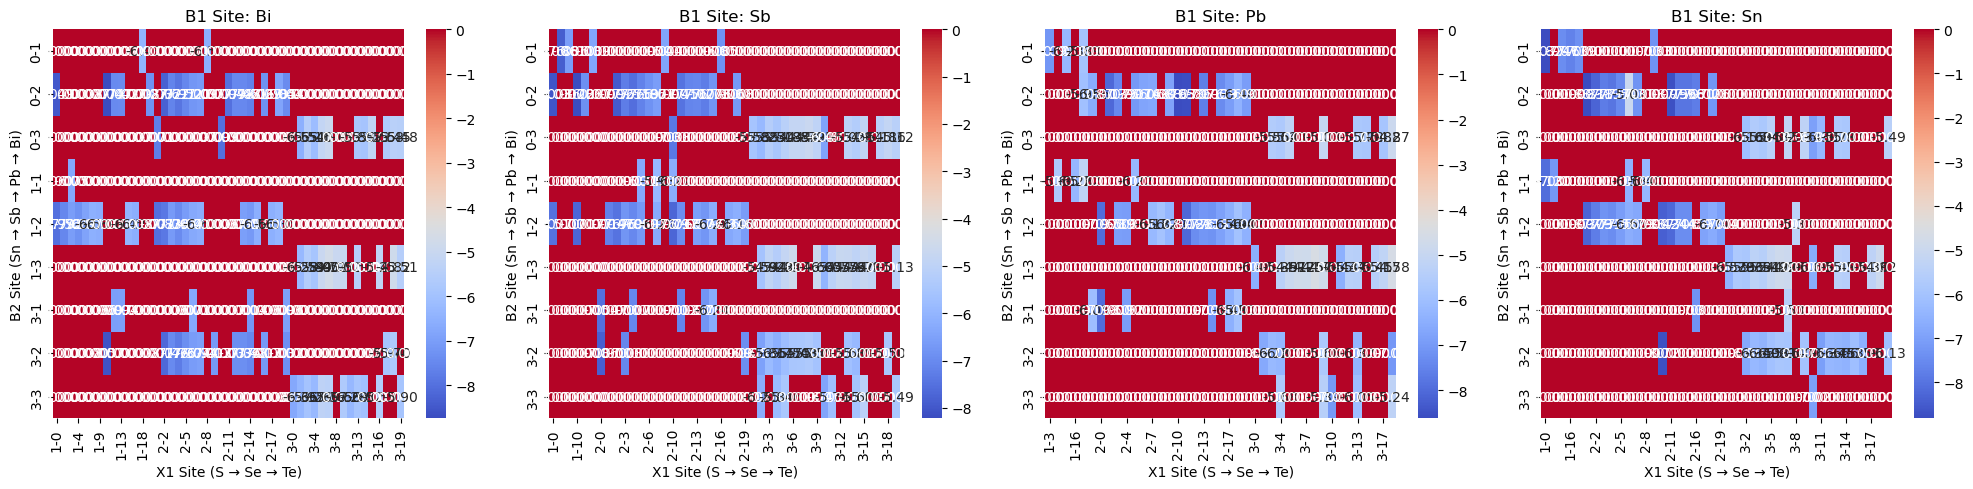

In [13]:
B1_site_elements = df['B1_site'].unique()
fig, axes = plt.subplots(1, len(B1_site_elements), figsize=(20, 5))

for i, B1_site in enumerate(B1_site_elements):
    subset = df[df['B1_site'] == B1_site]

    pivot = subset.pivot_table(index=['B2_site_order','X2_site_order'], columns=['X1_site_order','A2_site_order'], values='Ef_per_cell', aggfunc='mean', fill_value=0)
    
    # Plot Heatmap
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"B1 Site: {B1_site}")
    axes[i].set_xlabel("X1 Site (S → Se → Te)")
    axes[i].set_ylabel("B2 Site (Sn → Sb → Pb → Bi)")

plt.tight_layout()
plt.show()

In [14]:
atomic_number_dict = {
    'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30,
    'Y': 39, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 'Ag': 47, 'Cd': 48,  
    'Sn': 50, 'Sb': 51, 'Pb': 82, 'Bi': 83,  
    'S': 16, 'Se': 34, 'Te': 52  
}

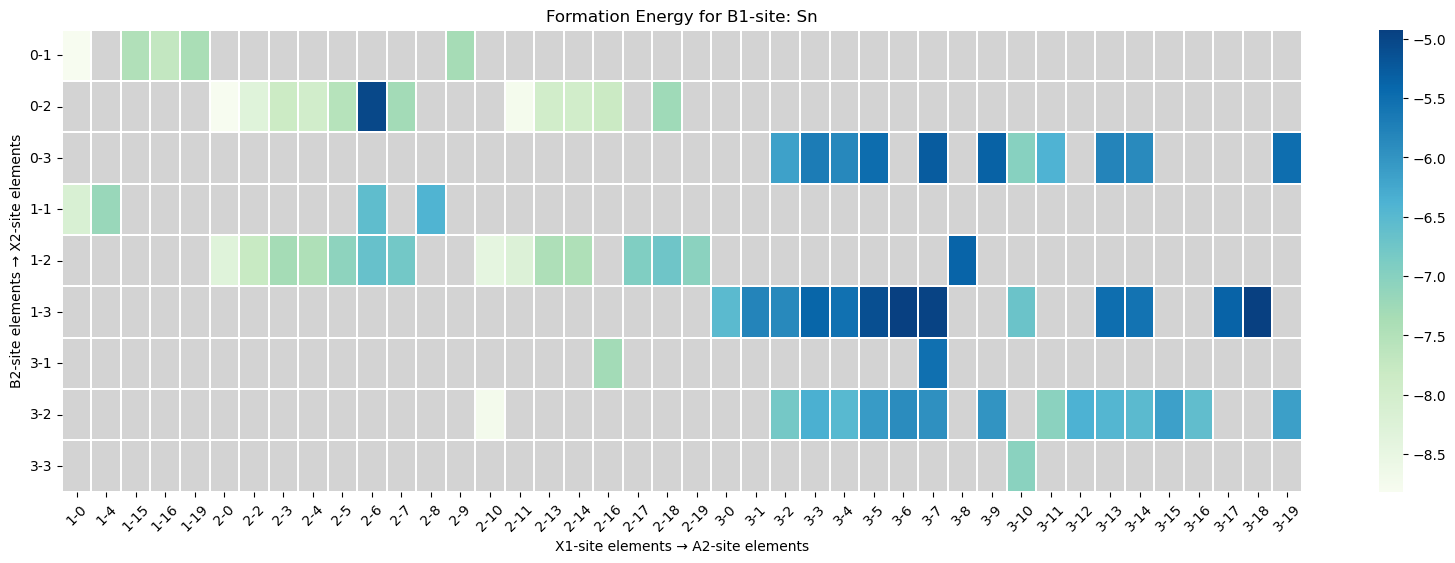

In [15]:
unique_B1_sites = sorted(subset['B1_site'].unique(), key=lambda x: atomic_number_dict[x])

for B1 in unique_B1_sites:
    subset_B1 = subset[subset['B1_site'] == B1]
    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='Ef_per_cell', 
                                  aggfunc='mean')
    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")   
    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot,annot=False,fmt=".2f",linewidth=0.1,mask=mask,cmap=cmap,linecolor="white",facecolor='red')
    
    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Formation Energy for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()

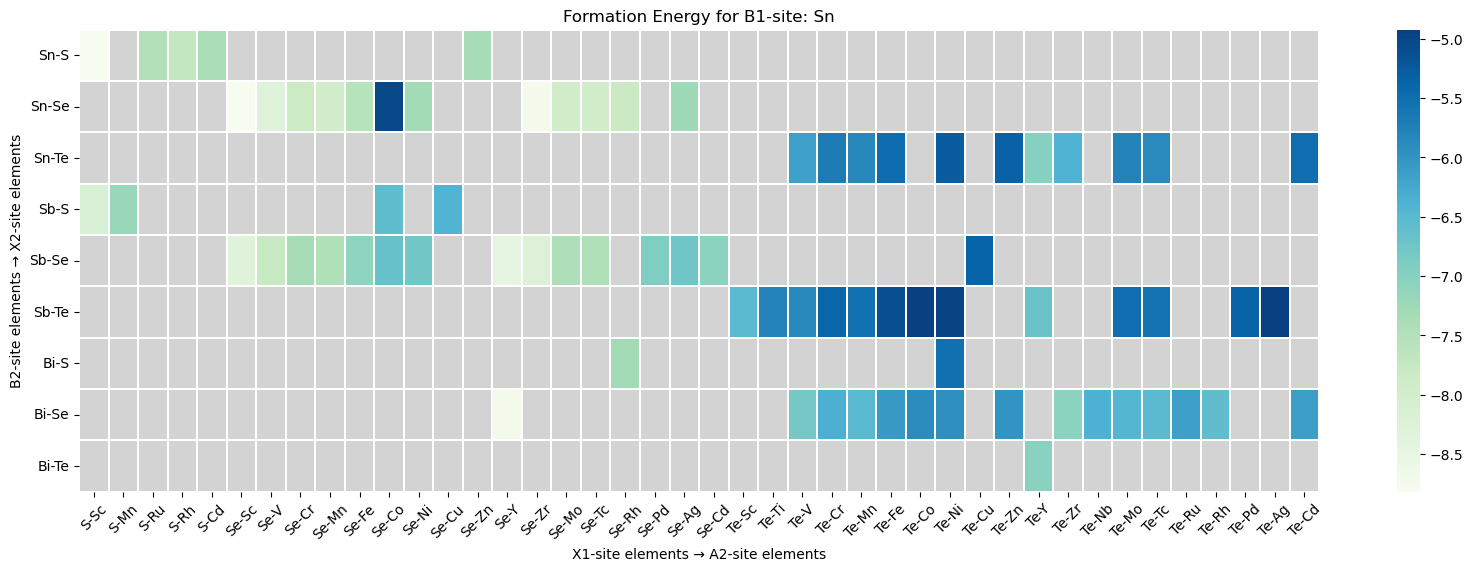

In [16]:
unique_B1_sites = sorted(subset['B1_site'].unique(), key=lambda x: atomic_number_dict[x])

for B1 in unique_B1_sites:
    subset_B1 = subset[subset['B1_site'] == B1]
    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='Ef_per_cell', 
                                  aggfunc='mean')

    A2_site_mapping = {0: 'Sc', 1: 'Ti', 2: 'V', 3: 'Cr', 4: 'Mn', 5: 'Fe', 6: 'Co', 7: 'Ni', 8: 'Cu', 9: 'Zn', 10: 'Y',
                       11: 'Zr', 12: 'Nb', 13: 'Mo', 14: 'Tc', 15: 'Ru', 16: 'Rh', 17: 'Pd', 18: 'Ag', 19: 'Cd'}
    
    B1_site_mapping = {0: 'Sn', 1: 'Sb', 2: 'Pb', 3: 'Bi'}
    B2_site_mapping = {0: 'Sn', 1: 'Sb', 2: 'Pb', 3: 'Bi'}
    
    X1_site_mapping = {1: 'S', 2: 'Se', 3: 'Te'}
    X2_site_mapping = {1: 'S', 2: 'Se', 3: 'Te'}
    
    pivot.columns = [f"{X1_site_mapping[x1]}-{A2_site_mapping[a2]}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping[b2]}-{X2_site_mapping[x2]}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")   
    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot,annot=False,fmt=".2f",linewidth=0.1,mask=mask,cmap=cmap,linecolor="white",facecolor='red')
    
    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Formation Energy for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()

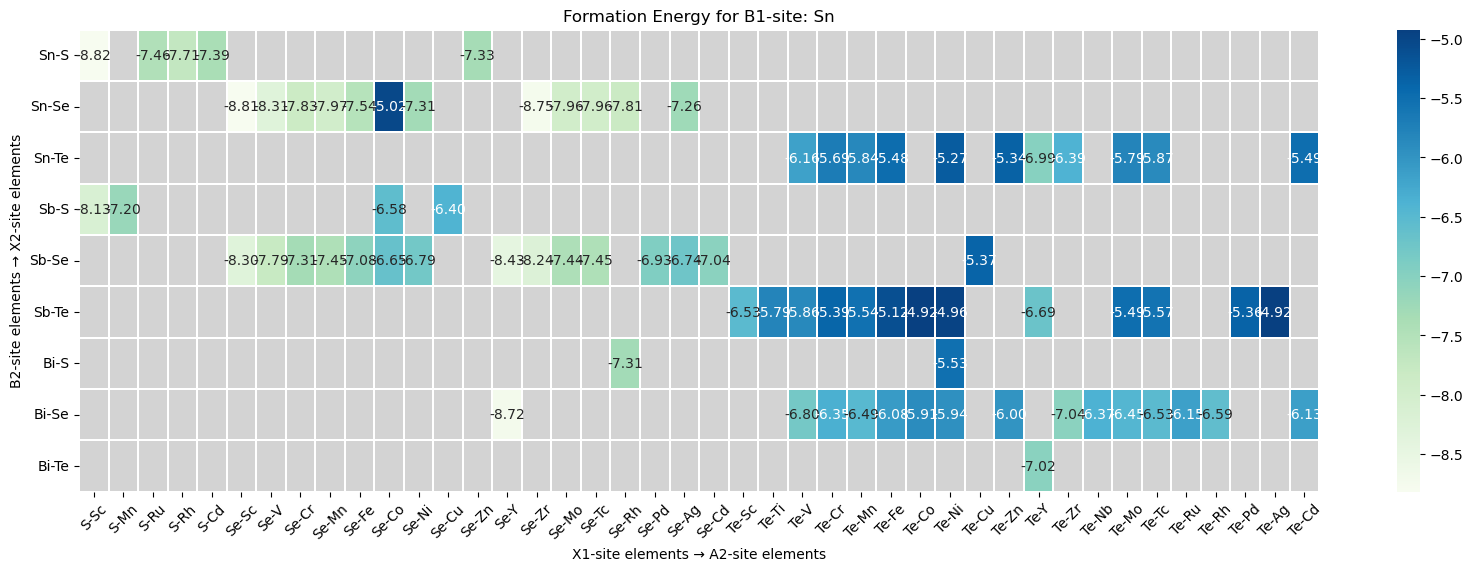

In [17]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

# Get unique B1-sites
unique_B1_sites = sorted(subset['B1_site'].unique())  # ['Sn', 'Sb', 'Pb', 'Bi']

# Loop through each B1-type and plot separately
for B1 in unique_B1_sites:
    subset_B1 = subset[subset['B1_site'] == B1]  # Filter only for this B1-type
    
    # Pivot table for heatmap
    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='Ef_per_cell', 
                                  aggfunc='mean')

    # Rename columns and index for readability
    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    # Set mask and colormap
    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    # Plot heatmap
    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Formation Energy for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()  # Show the heatmap for this B1-site before moving to the next one


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


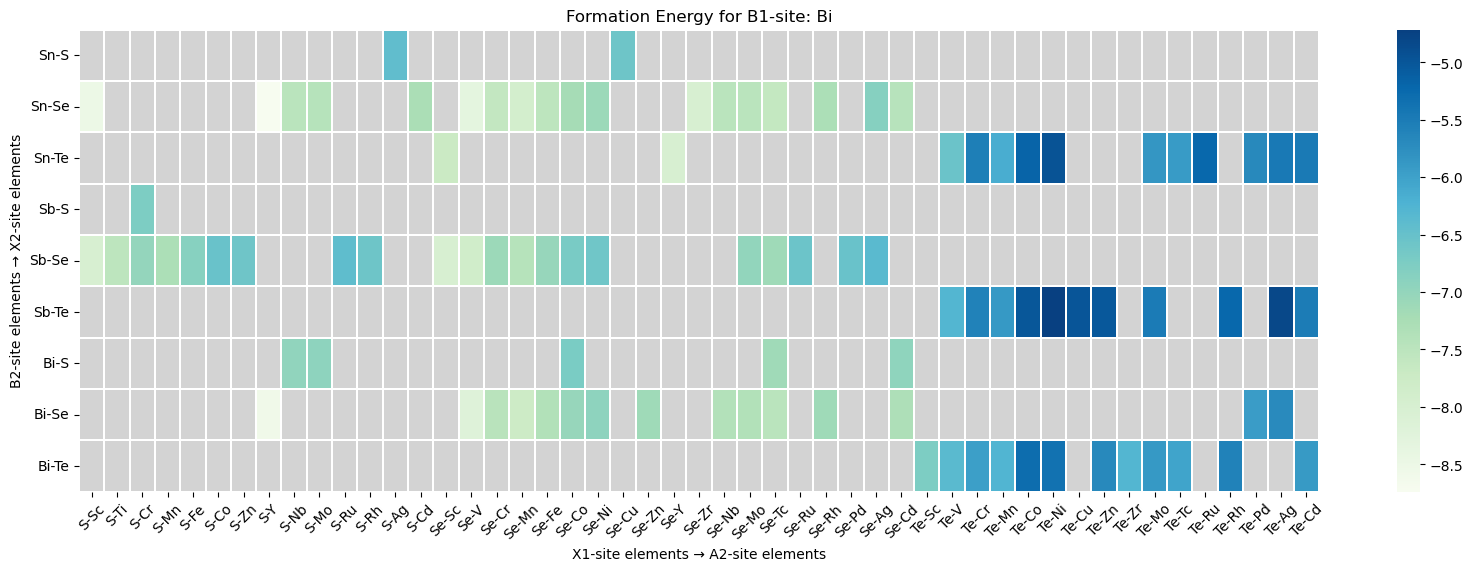

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


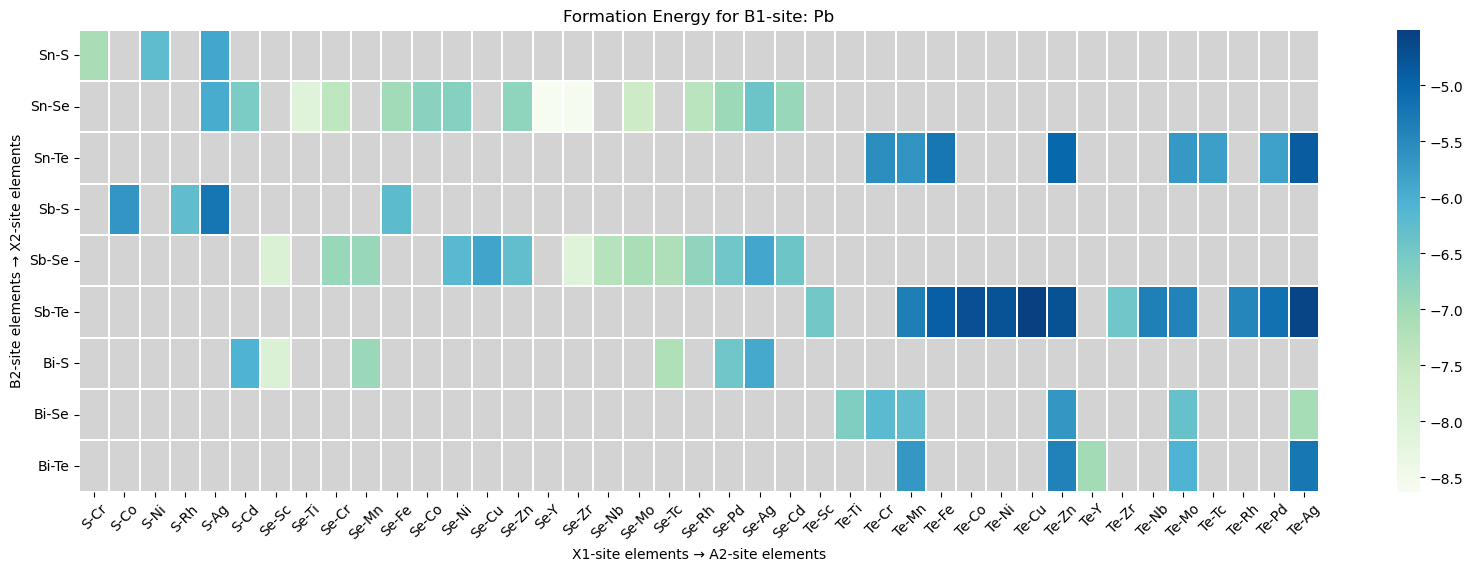

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


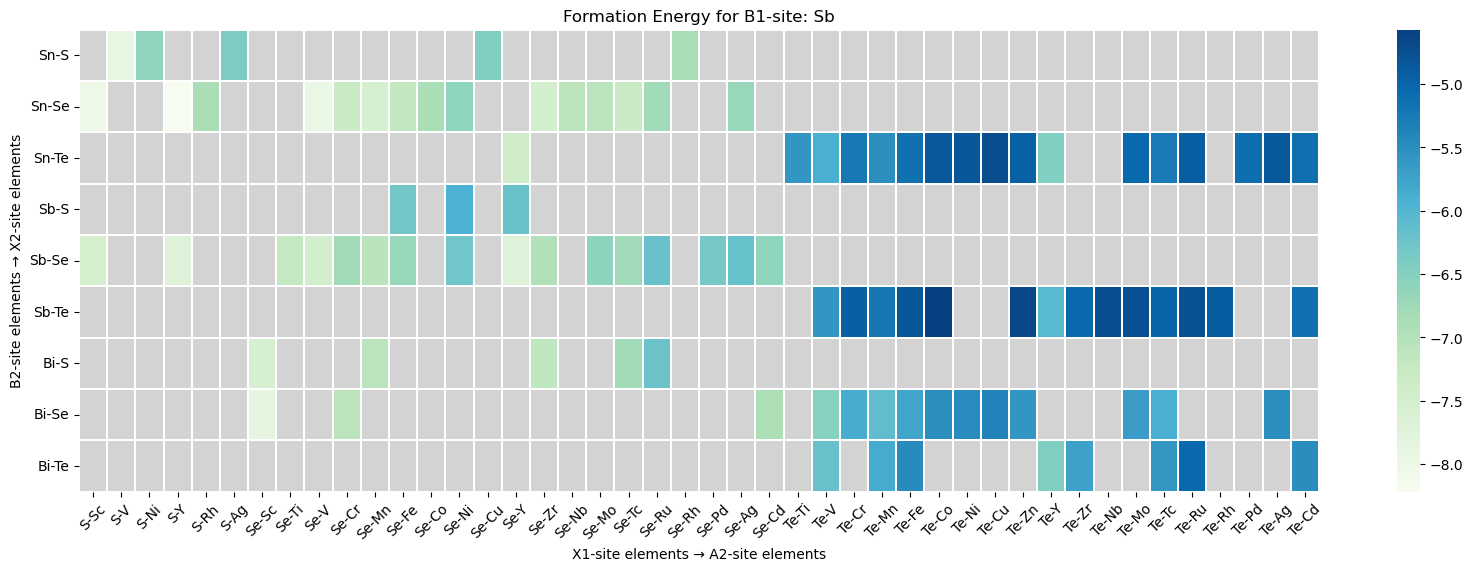

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


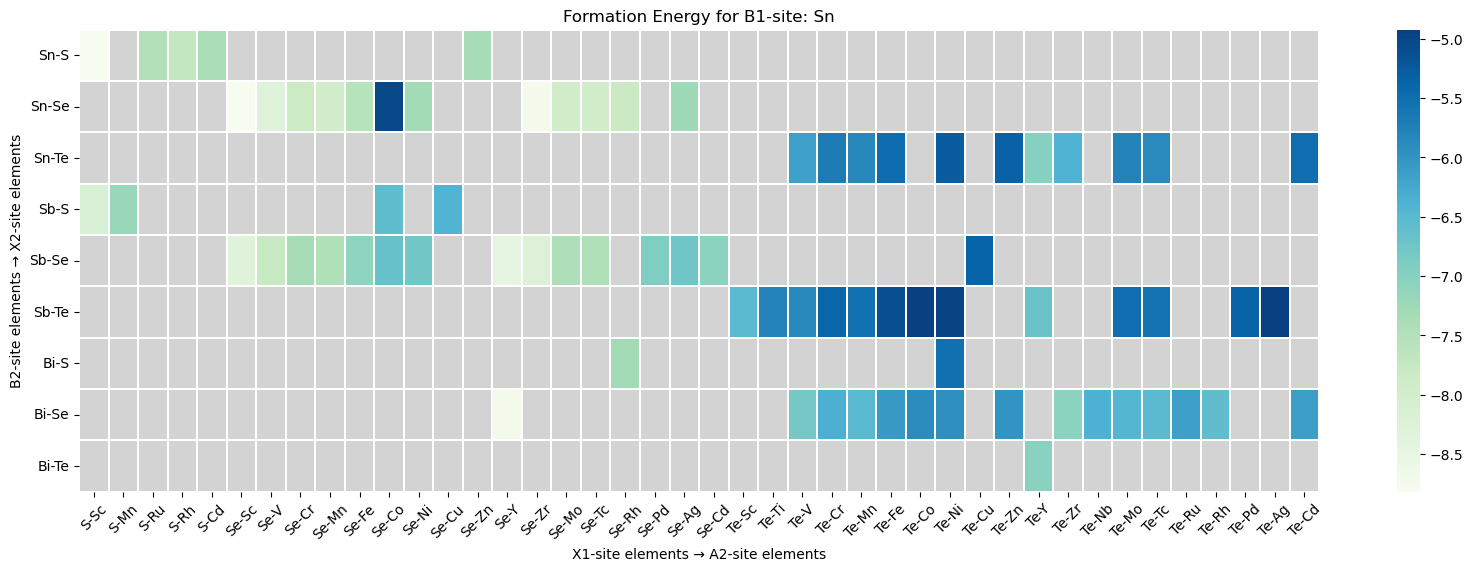

In [18]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())  # Ensure you're using df, not a pre-filtered subset

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]  # Correctly filter df for each B1-type
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='Ef_per_cell', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Formation Energy for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


In [51]:
## Heatmap colors
# 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd','OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
# 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone','pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'     
# 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'         
# 'twilight', 'twilight_shifted', 'hsv'
# 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2','Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b','tab20c'    
# 'flag', 'prism', 'ocean', 'gist_earth', 'terrain','gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap','cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet','turbo', 'nipy_spectral', 'gist_ncar'

In [30]:
## Magnetic Moment

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


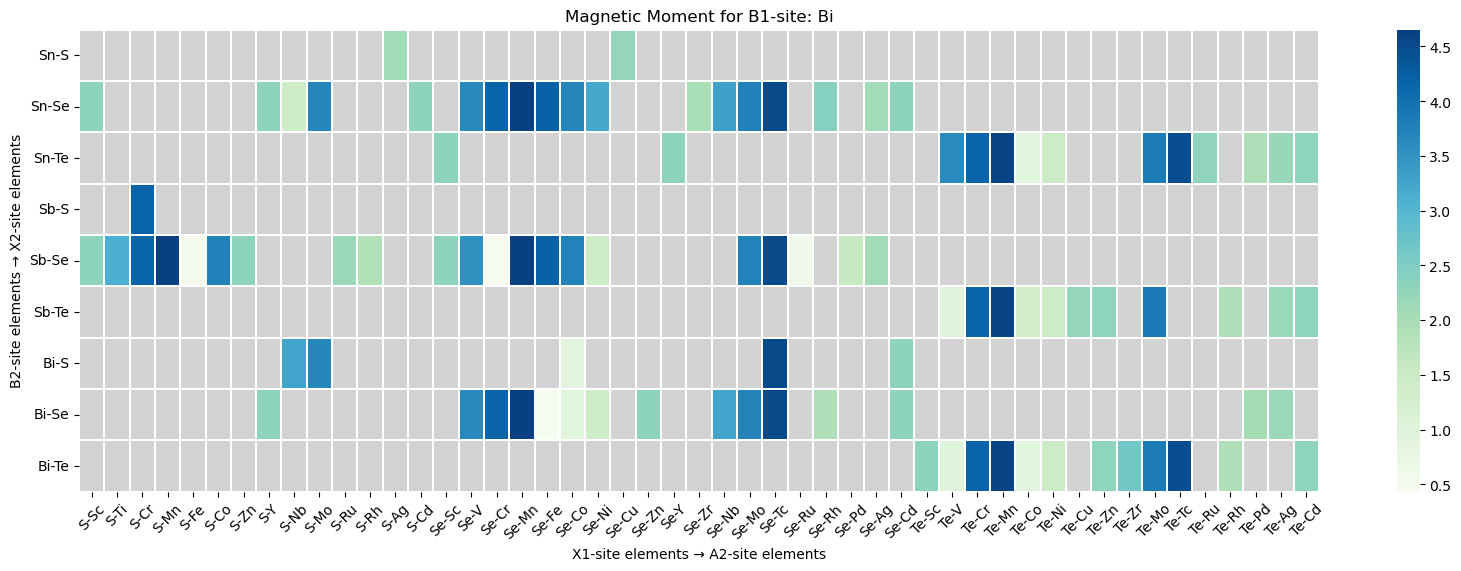

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


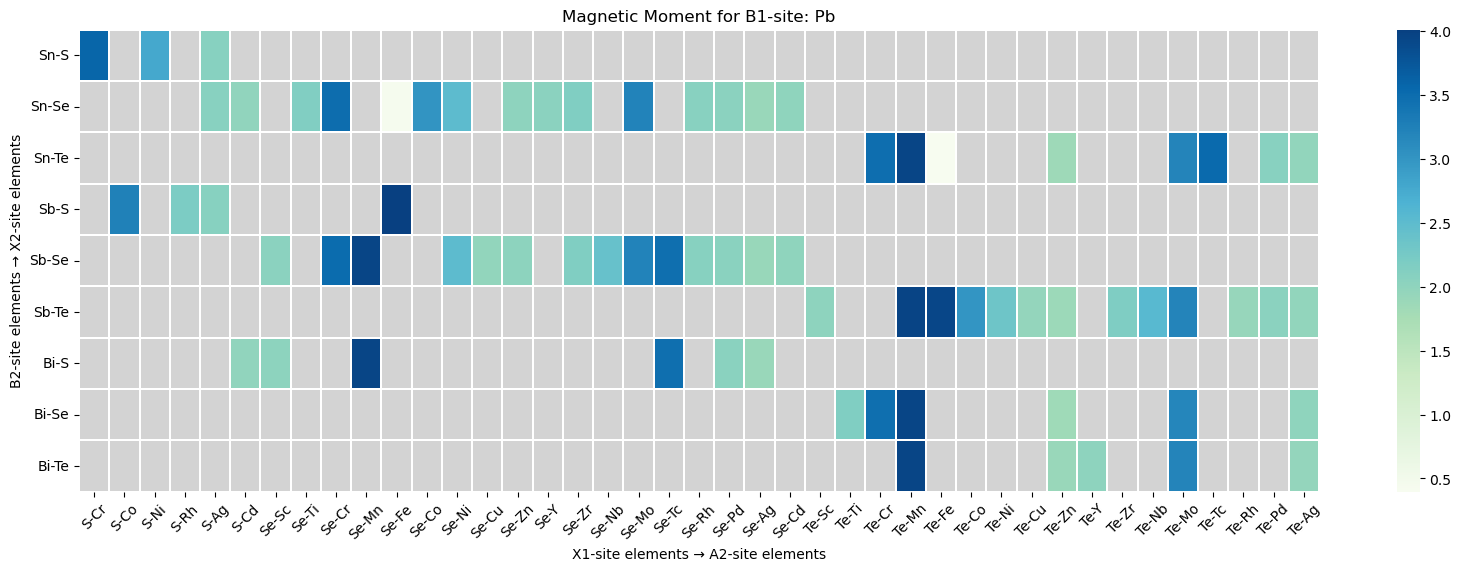

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


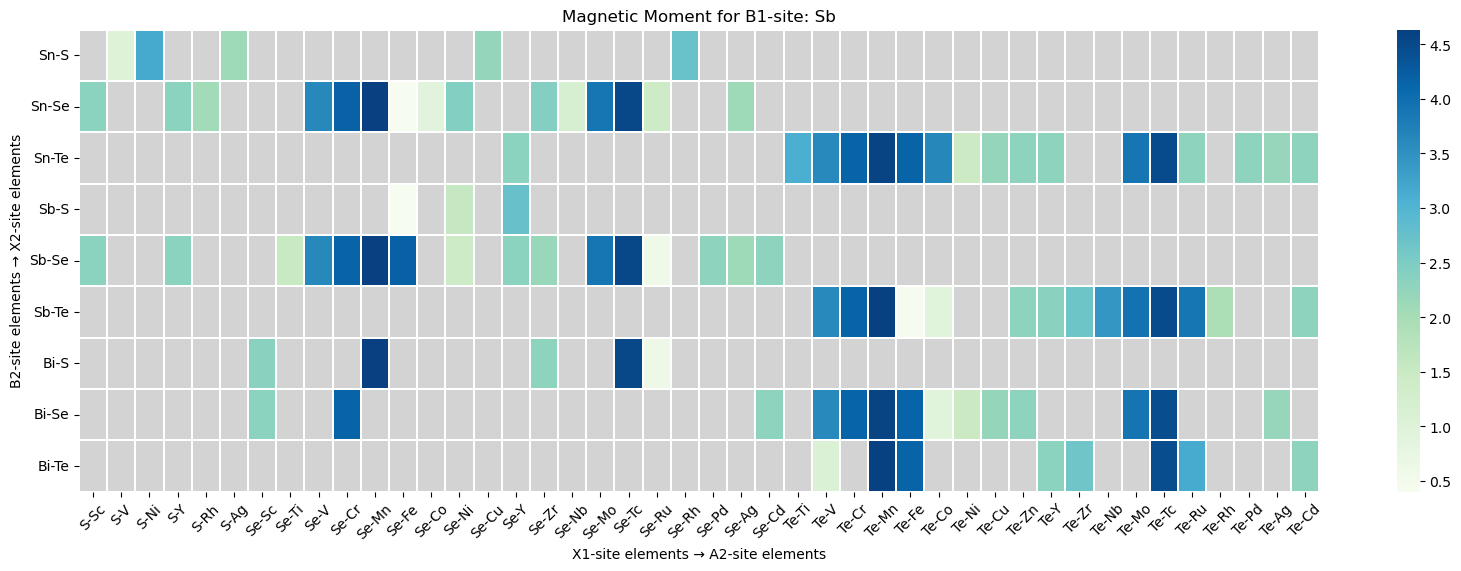

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


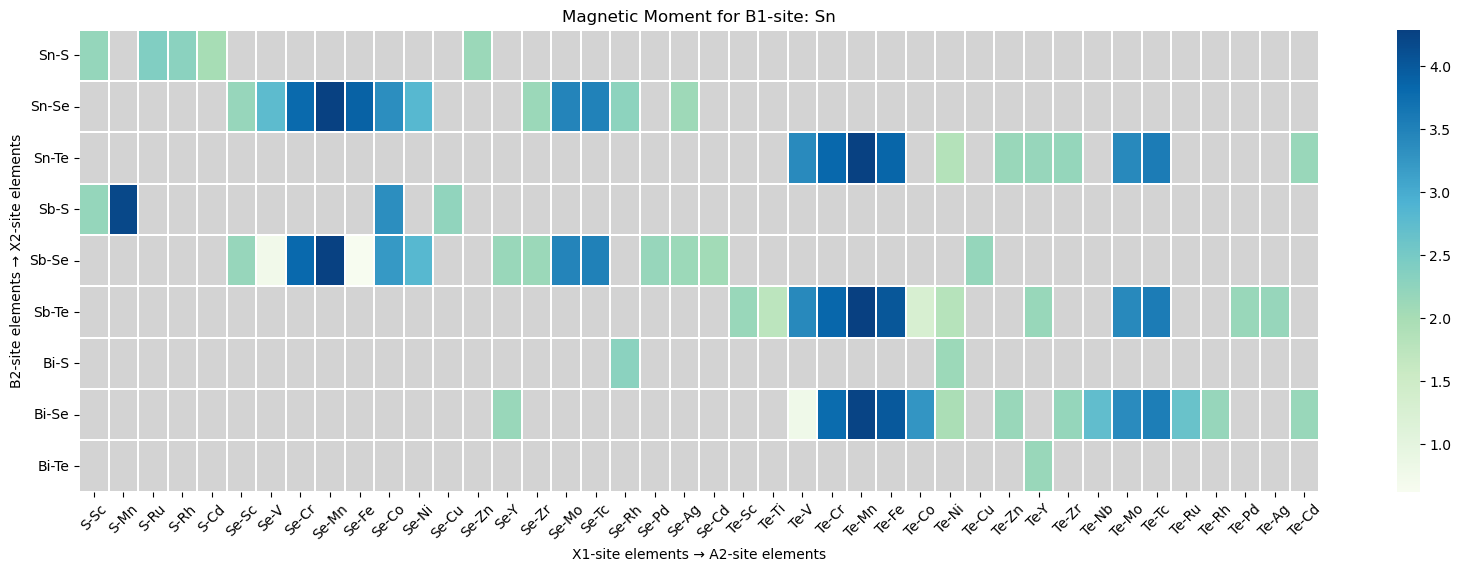

In [19]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='Mu_per_cell', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


In [59]:
## Band Gap

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


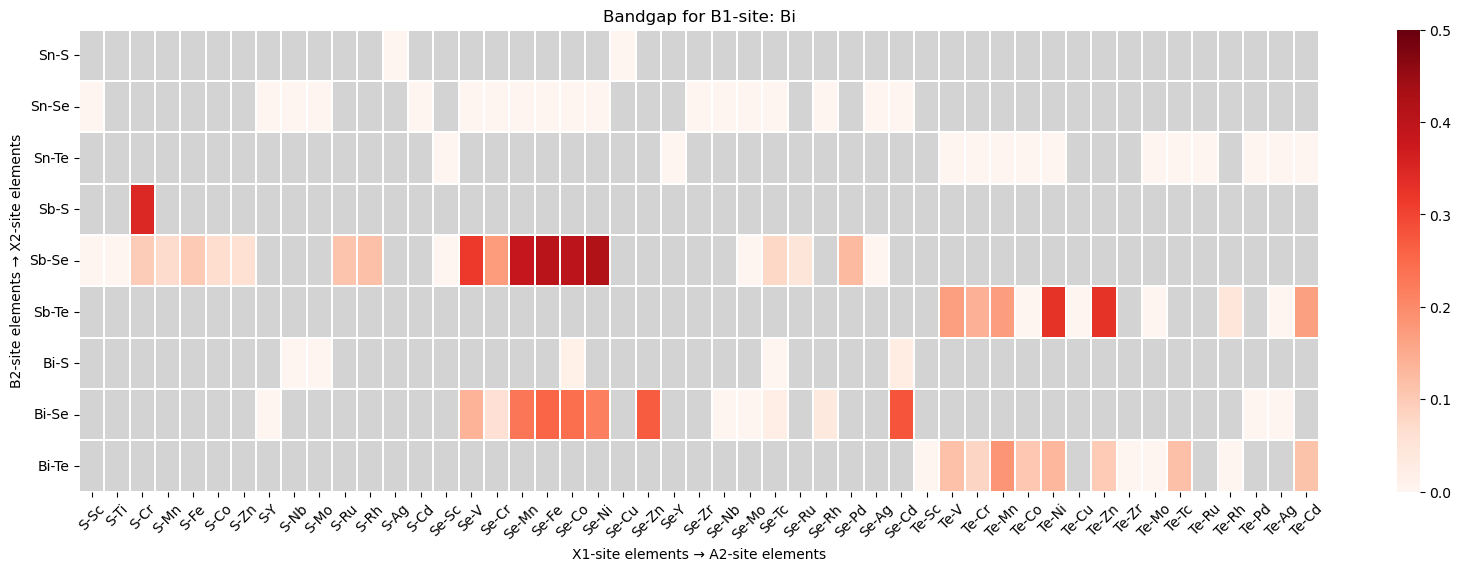

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


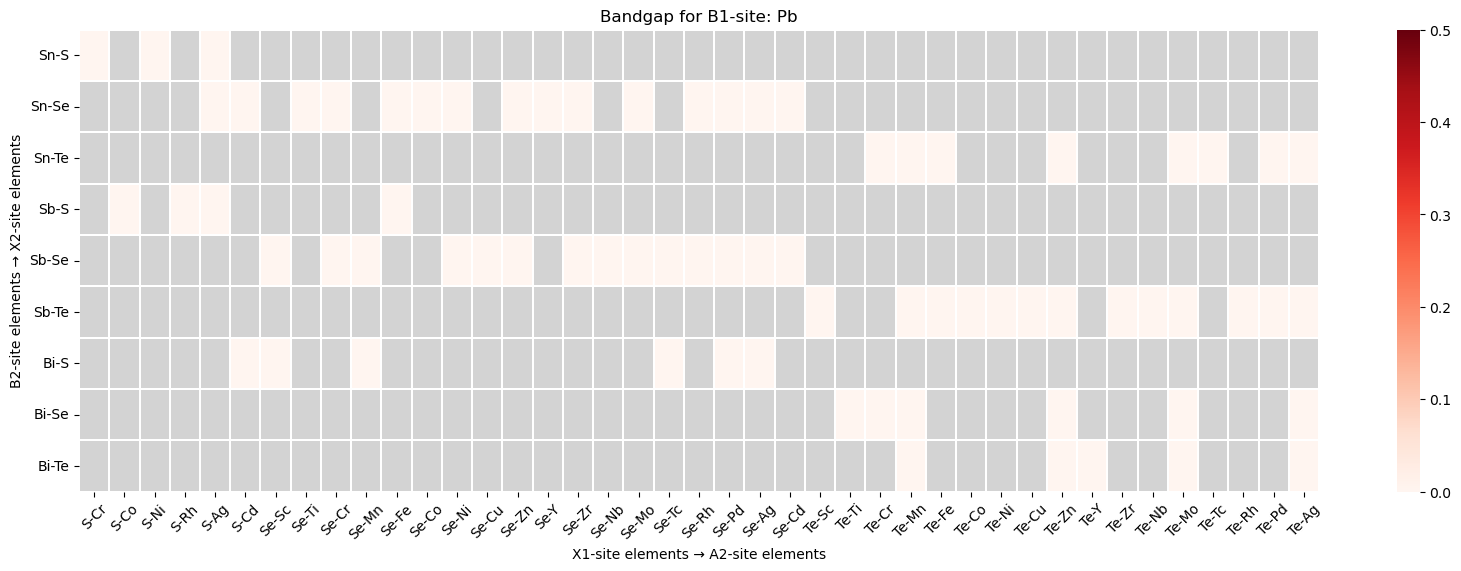

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


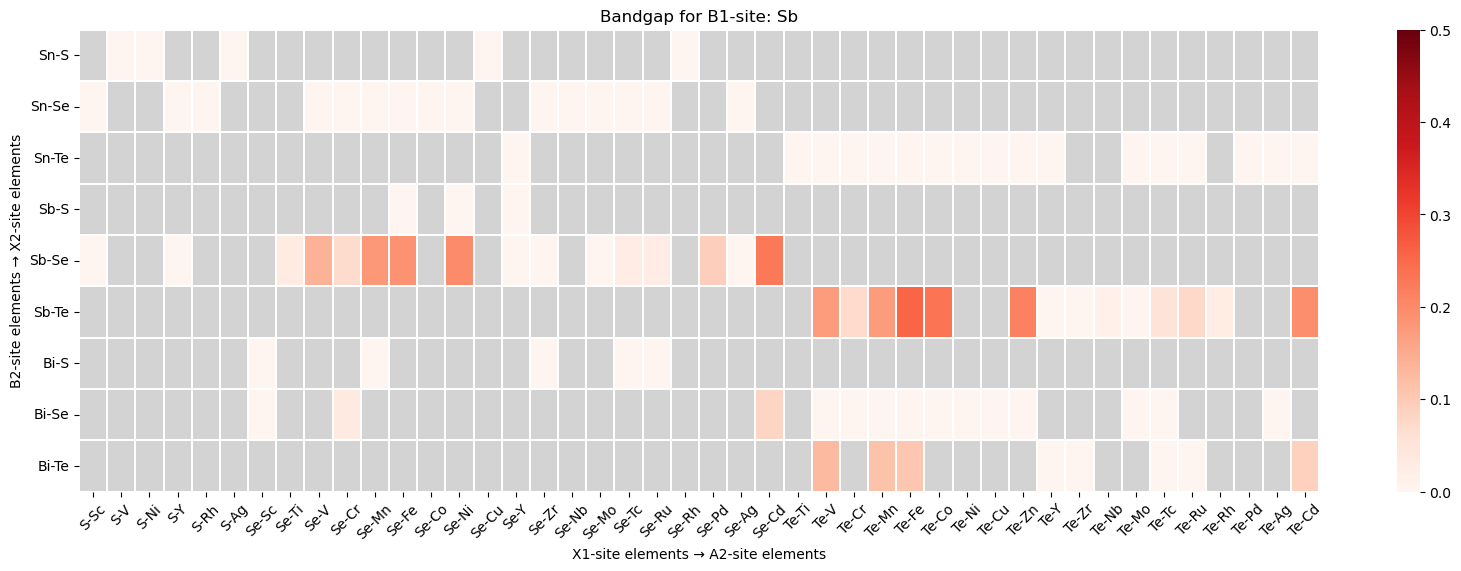

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


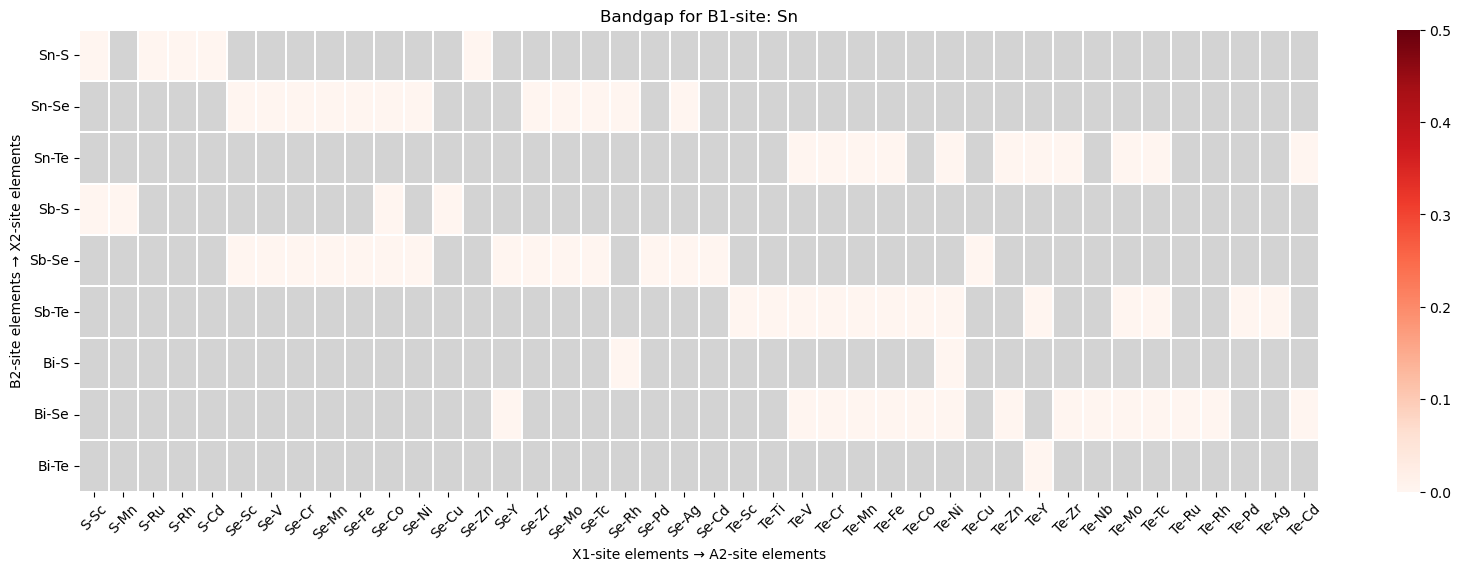

In [21]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='bandgap', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("Reds", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white",vmin=0.0,vmax=0.5)

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Bandgap for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


In [71]:
## Magnetic States

In [23]:
spin_states = df['spin_state']

In [24]:
df['numeric_spin_states'] = [1 if x=='FM' else 0 for x in spin_states]

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


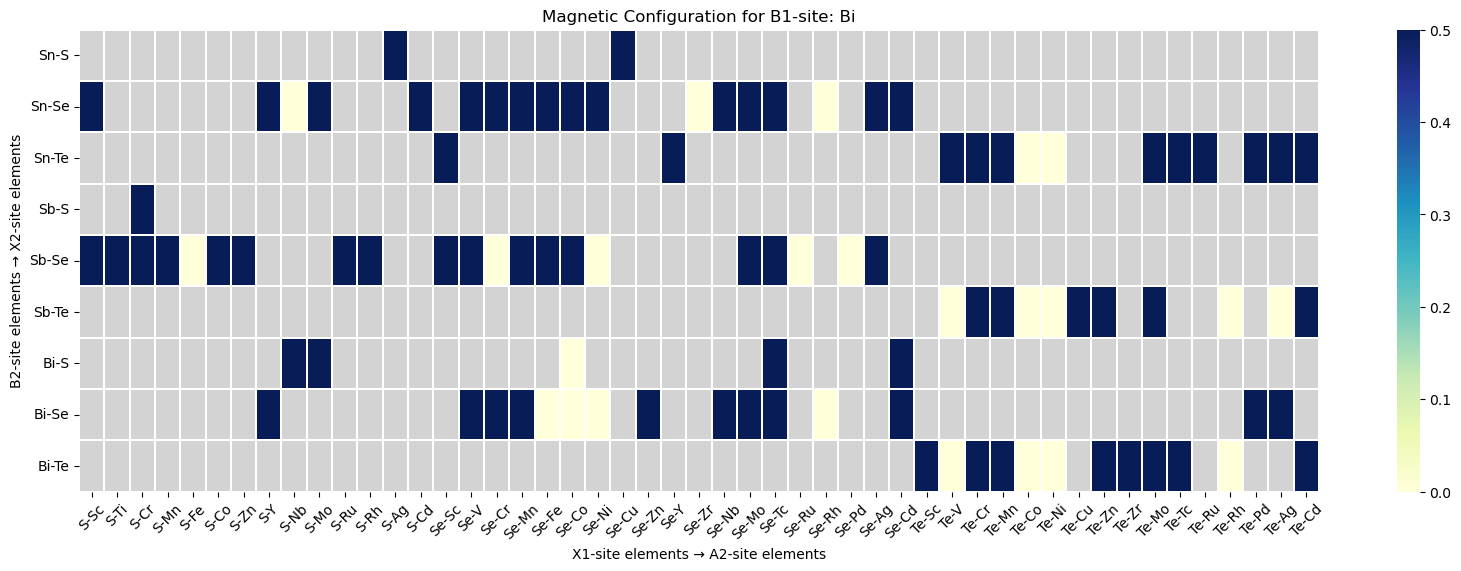

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


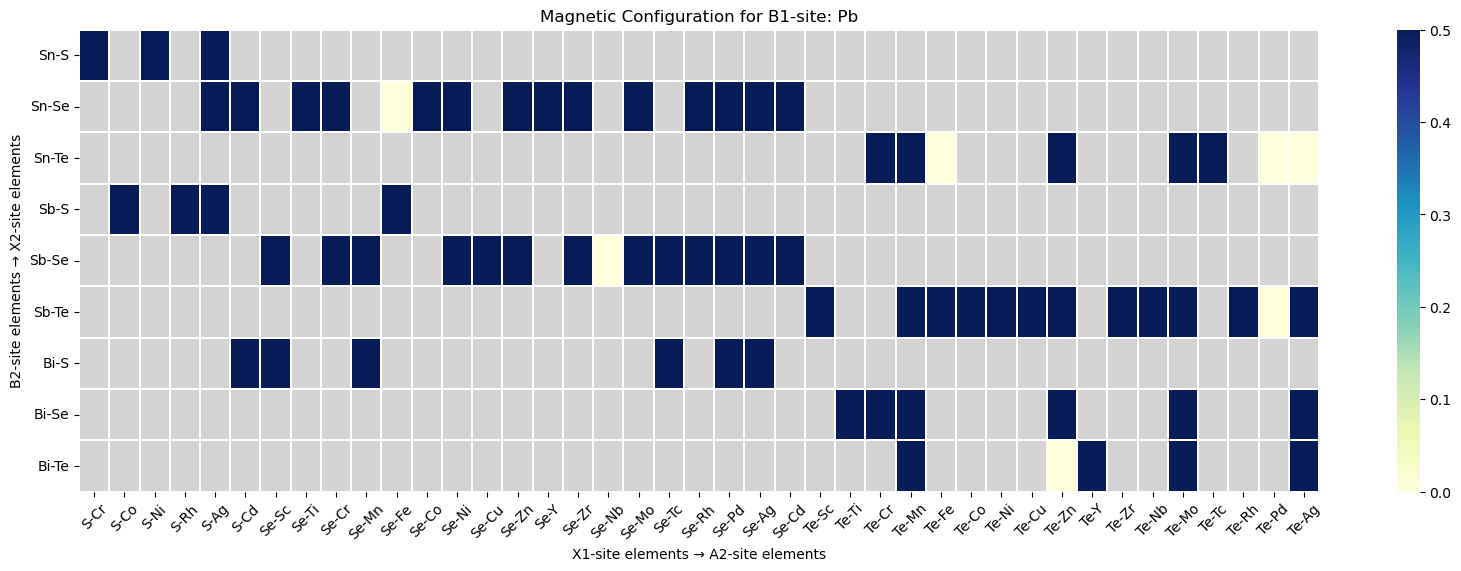

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


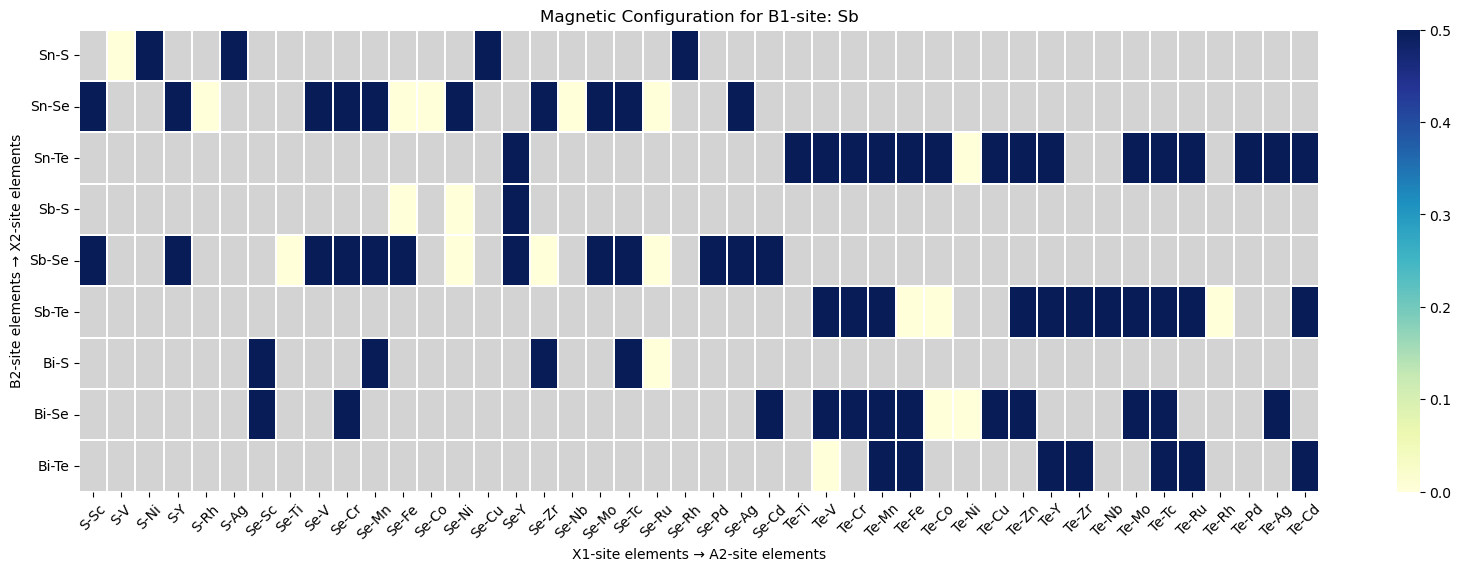

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


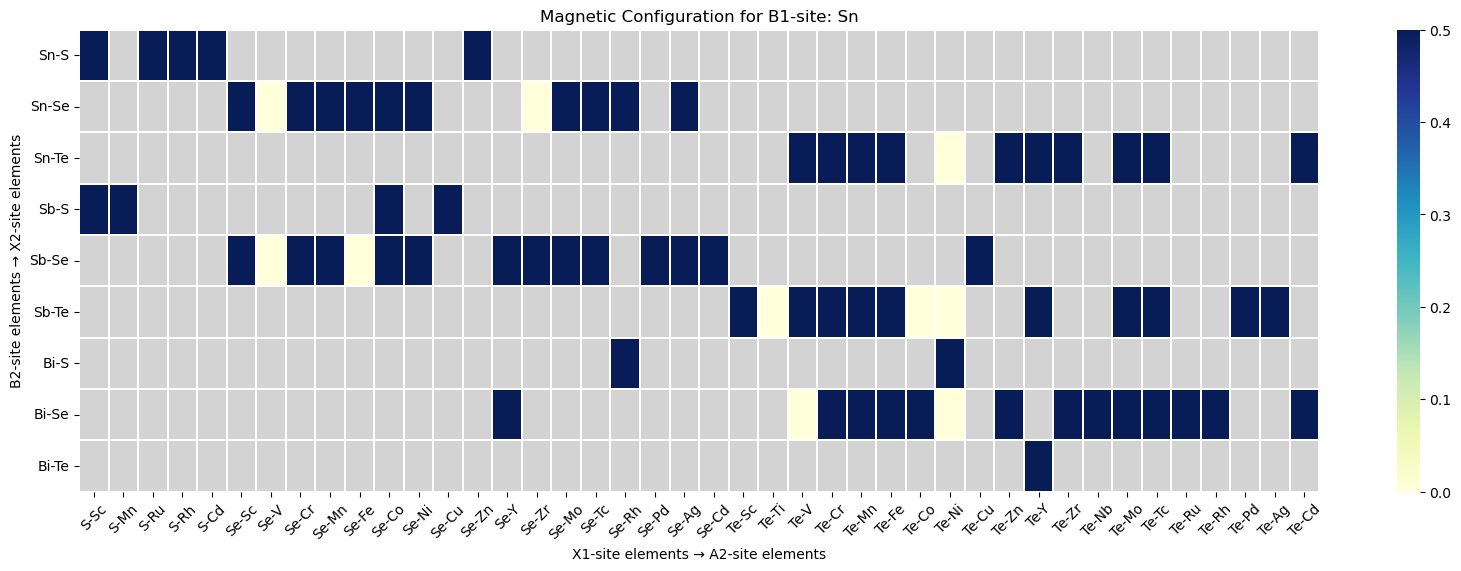

In [25]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='numeric_spin_states', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white",vmin=0.0,vmax=0.5)

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Configuration for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


In [1]:
## sitewise magnetic moments

In [27]:
import ast

# Define function to convert string to list
def str_to_list(s):
    return ast.literal_eval(s)

In [28]:
site_wise_moments = []
for i in range(len(df['sitewise_mu_mag'])):
    site_wise_moments.append(str_to_list(df['sitewise_mu_mag'][i]))

In [29]:
mu_A1 = [i[0] for i in site_wise_moments]
mu_A2 = [i[1] for i in site_wise_moments]
mu_B1 = [np.mean(i[2:6]) for i in site_wise_moments]
mu_X1 = [np.mean(i[6:14]) for i in site_wise_moments]
mu_B2 = [np.mean(i[14:18]) for i in site_wise_moments]
mu_X2 = [np.mean(i[18:24]) for i in site_wise_moments]

In [30]:
df['mu_A1'] = mu_A1
df['mu_A2'] = mu_A2
df['mu_B1'] = mu_B1
df['mu_X1'] = mu_X1
df['mu_B2'] = mu_B2
df['mu_X2'] = mu_X2

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


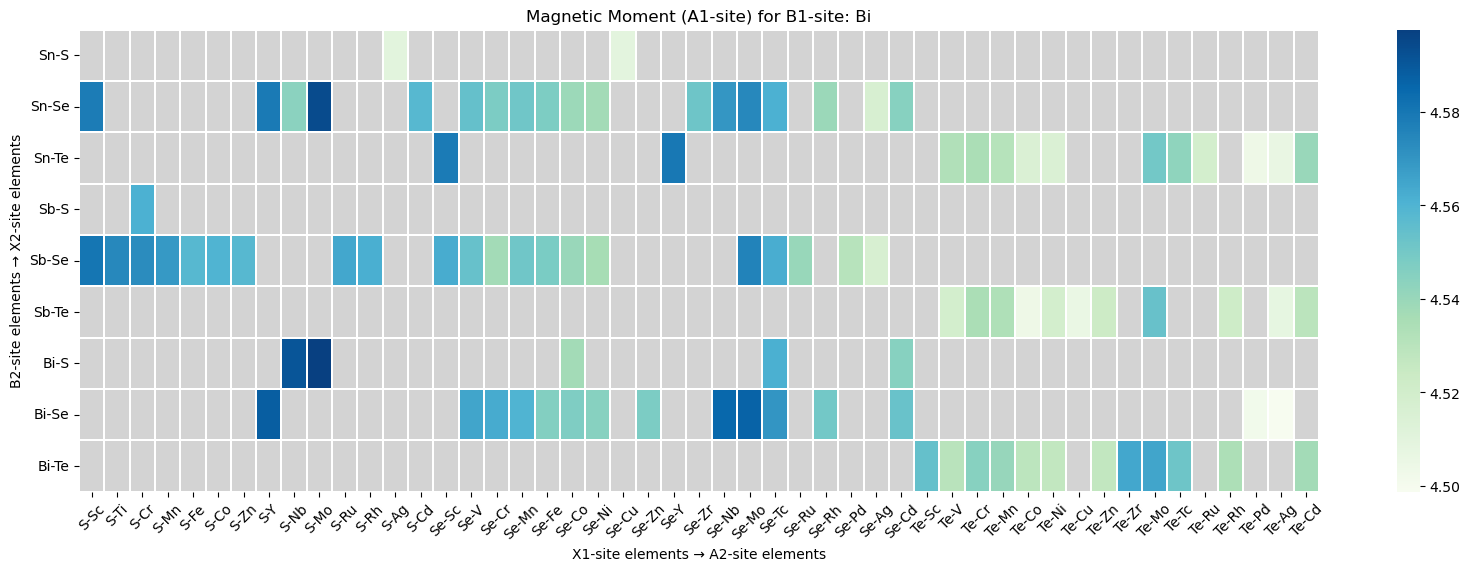

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


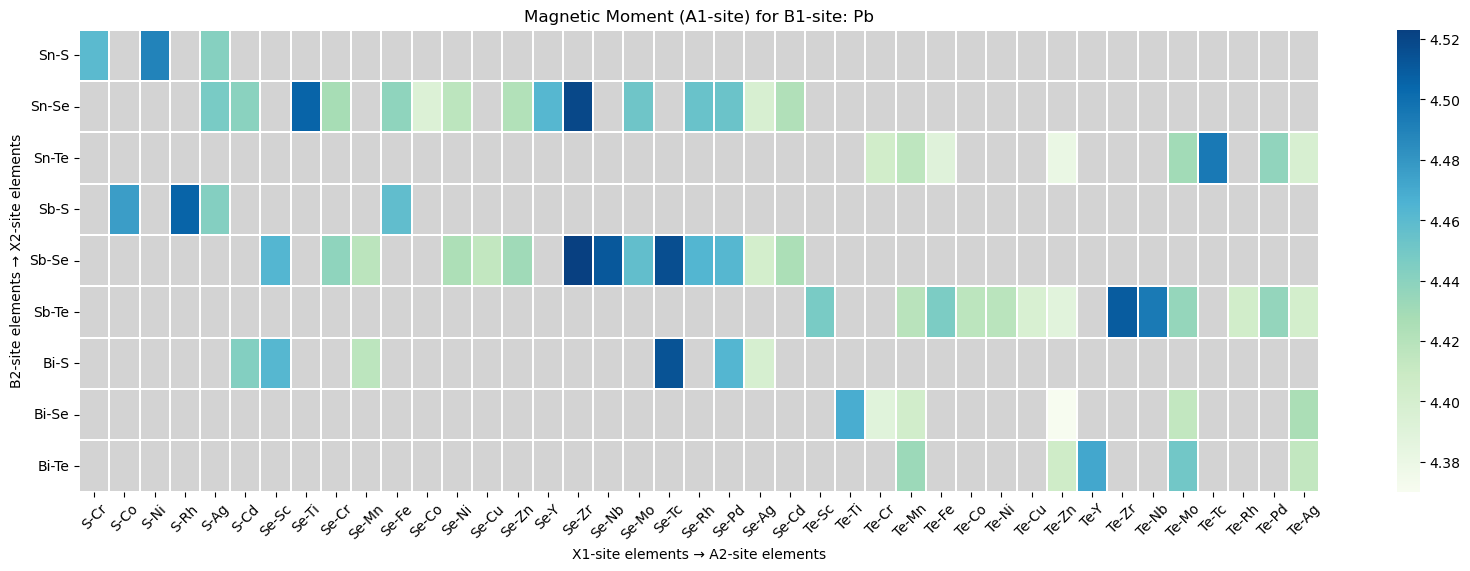

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


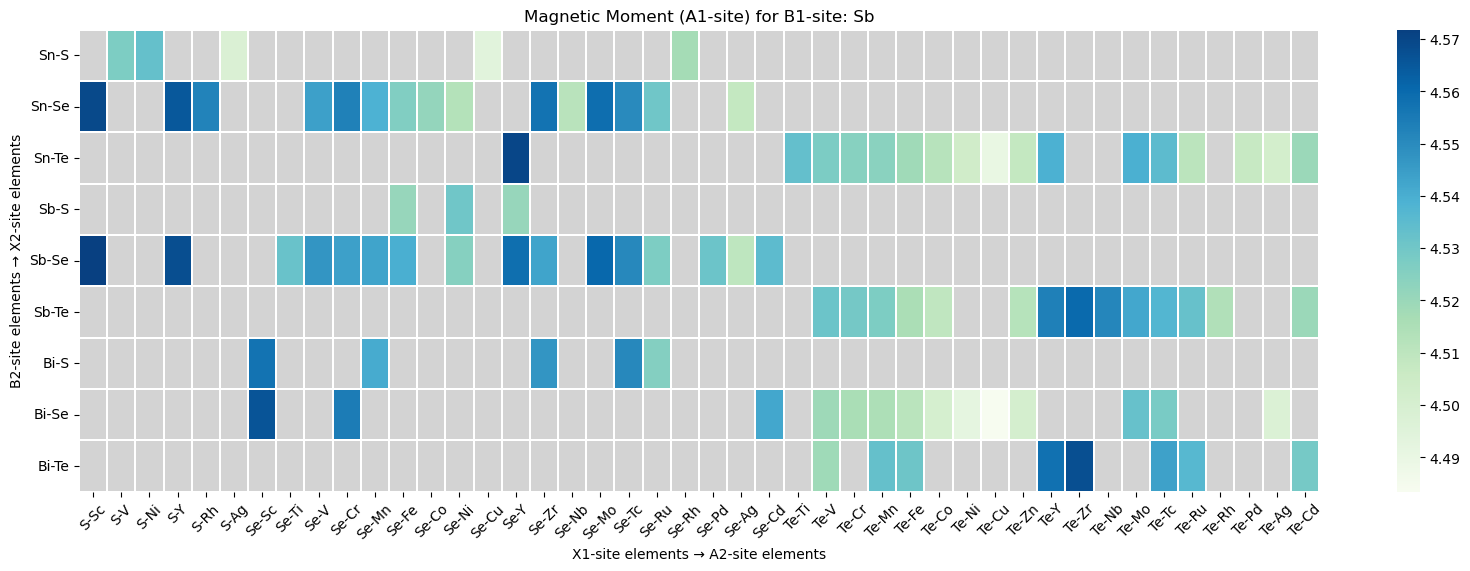

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


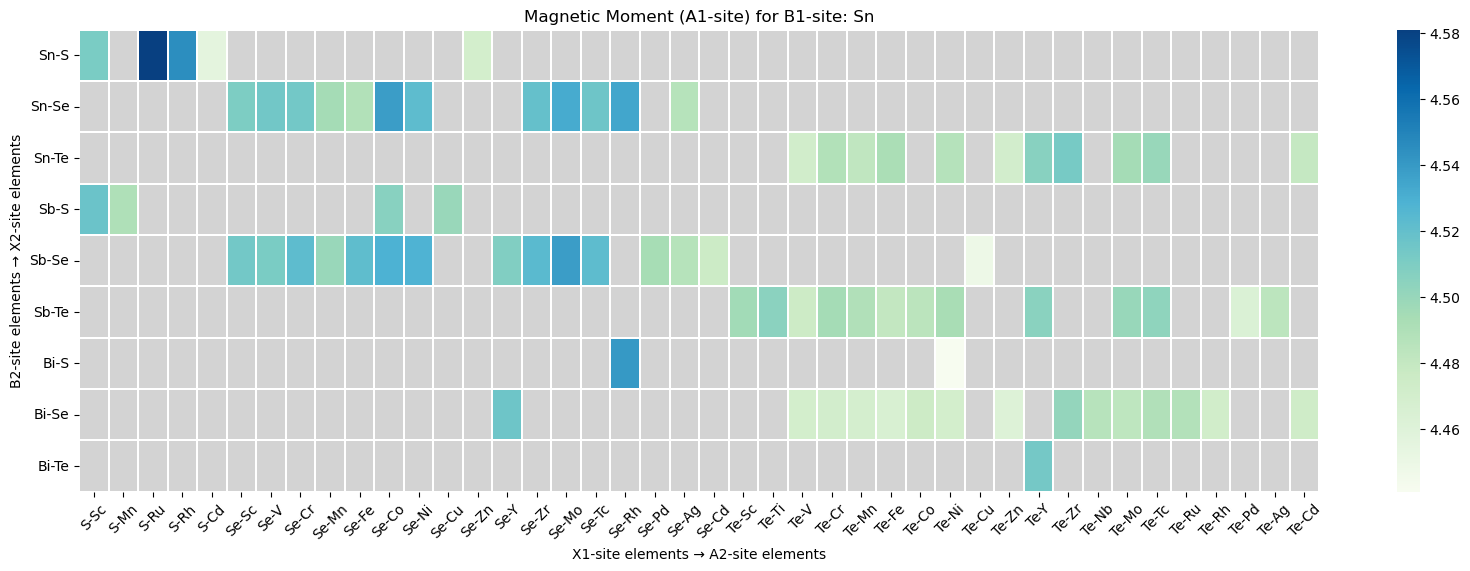

In [31]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_A1', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (A1-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


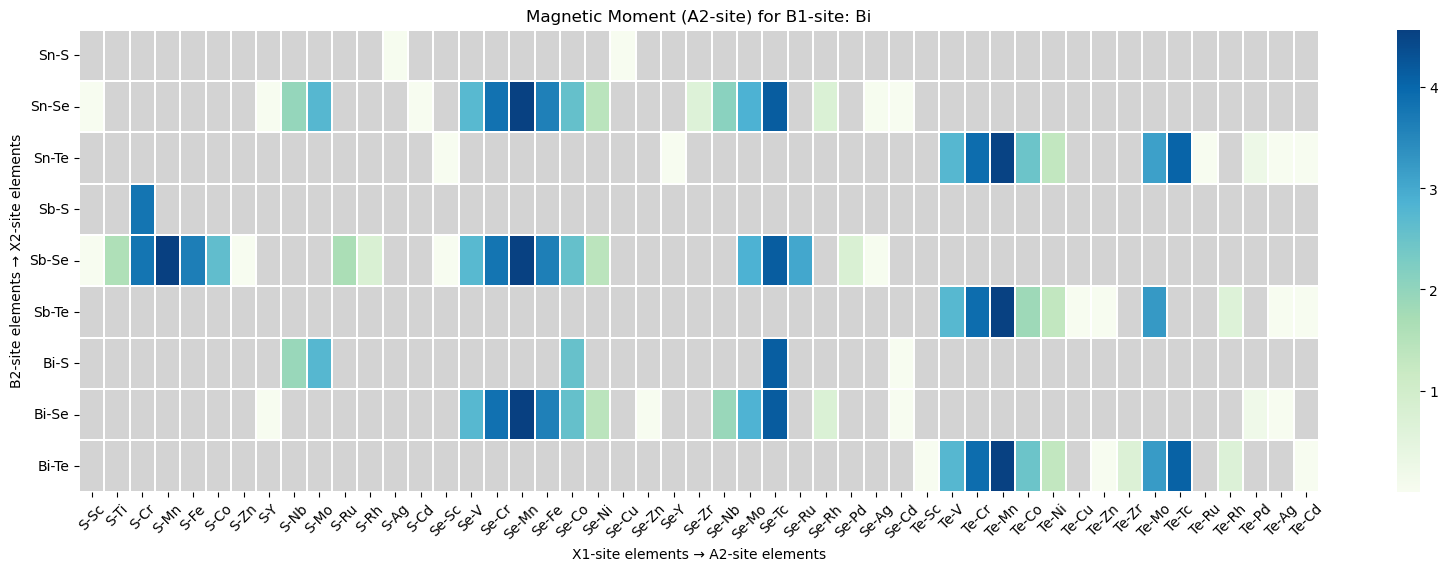

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


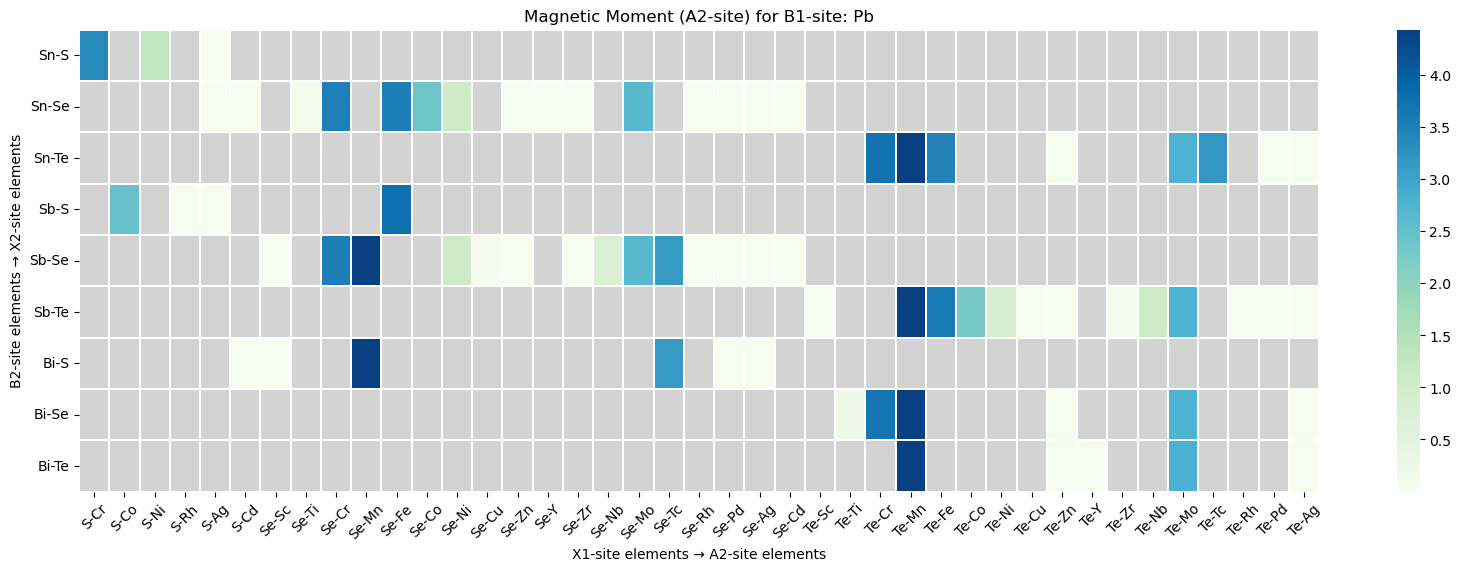

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


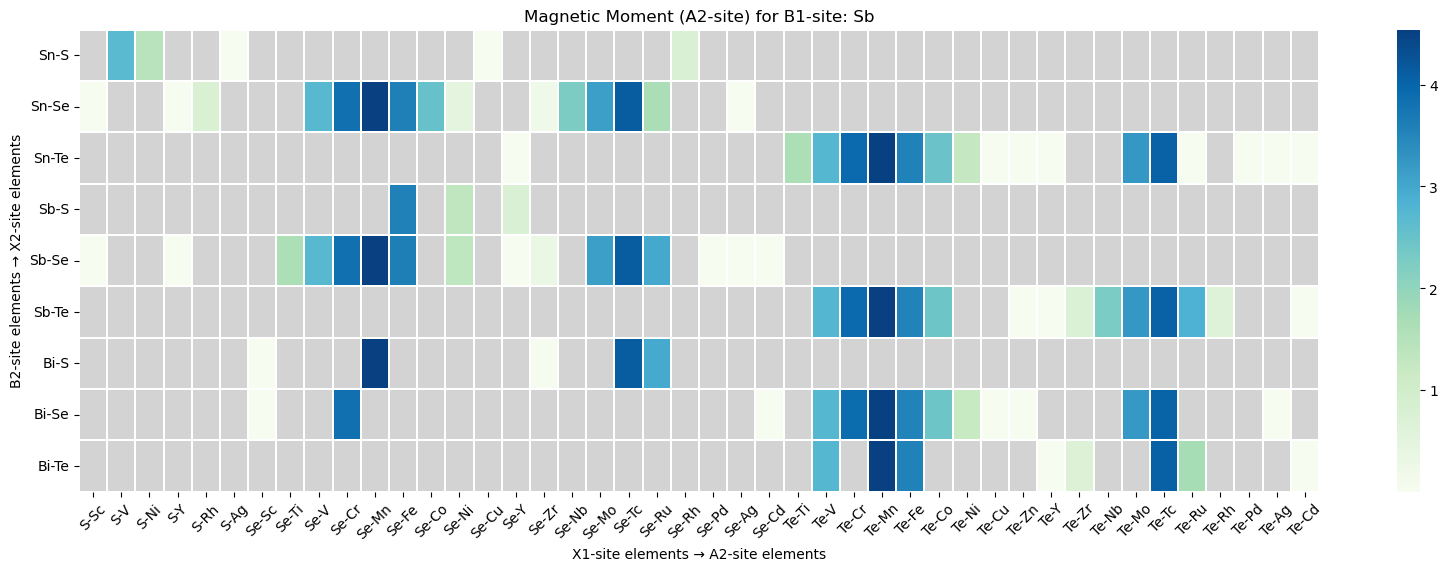

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


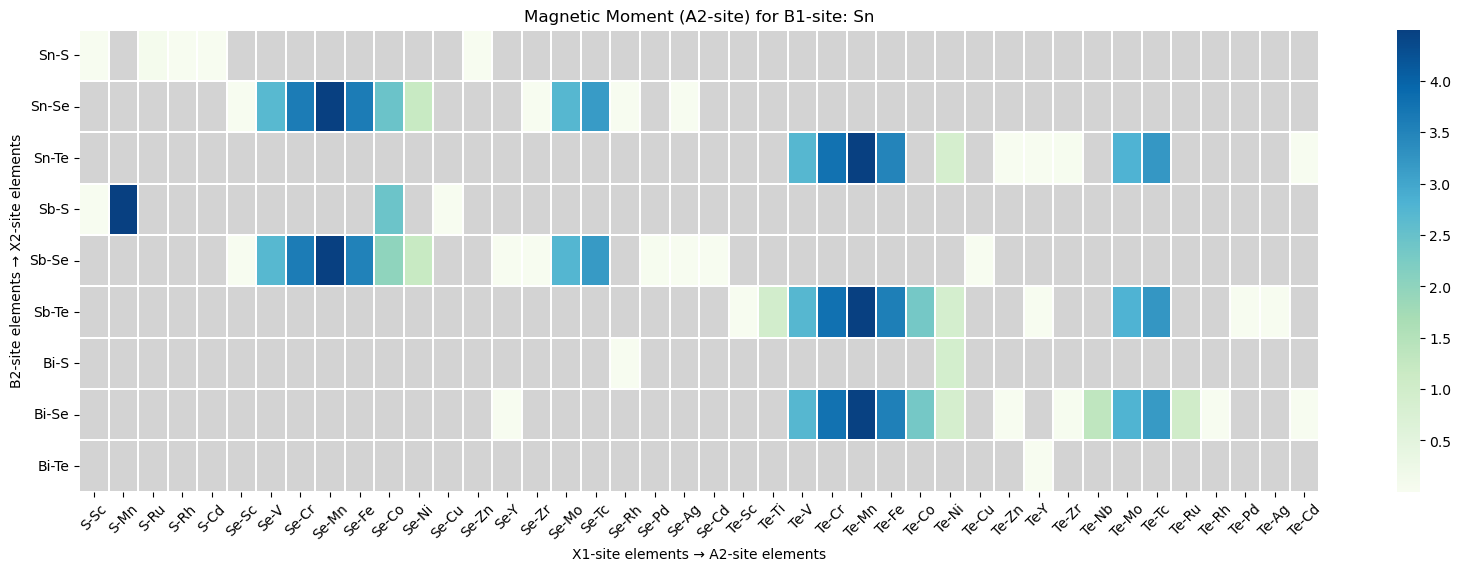

In [32]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_A2', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (A2-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


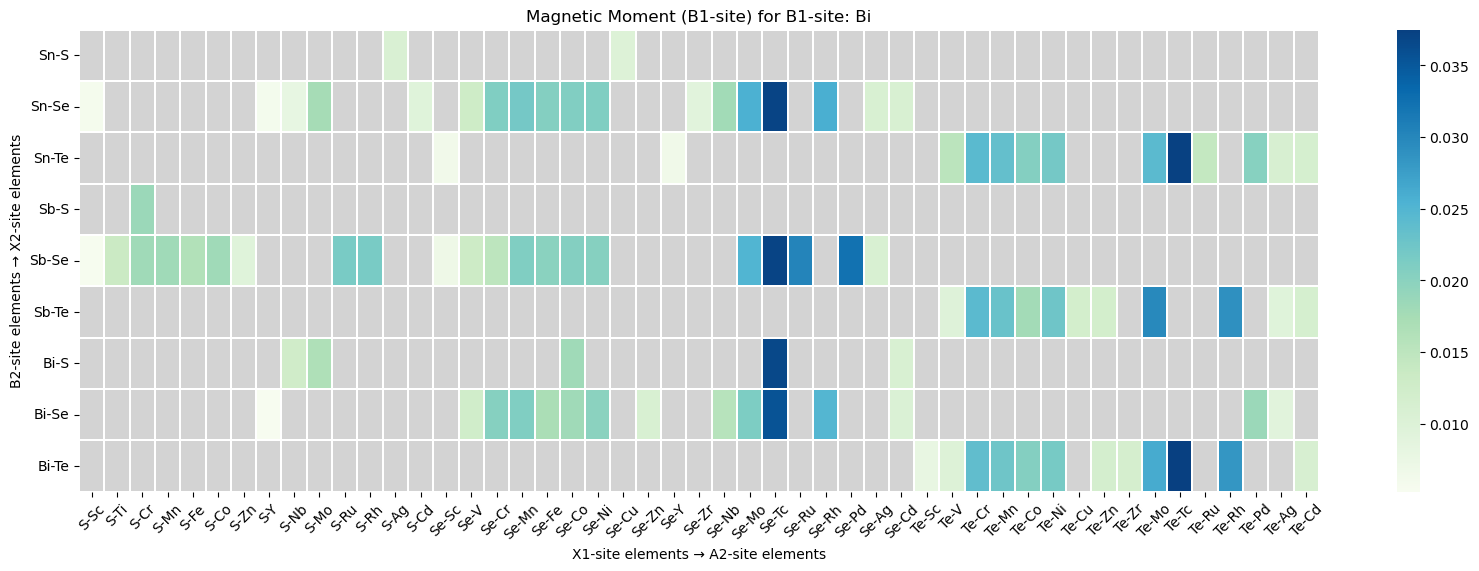

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


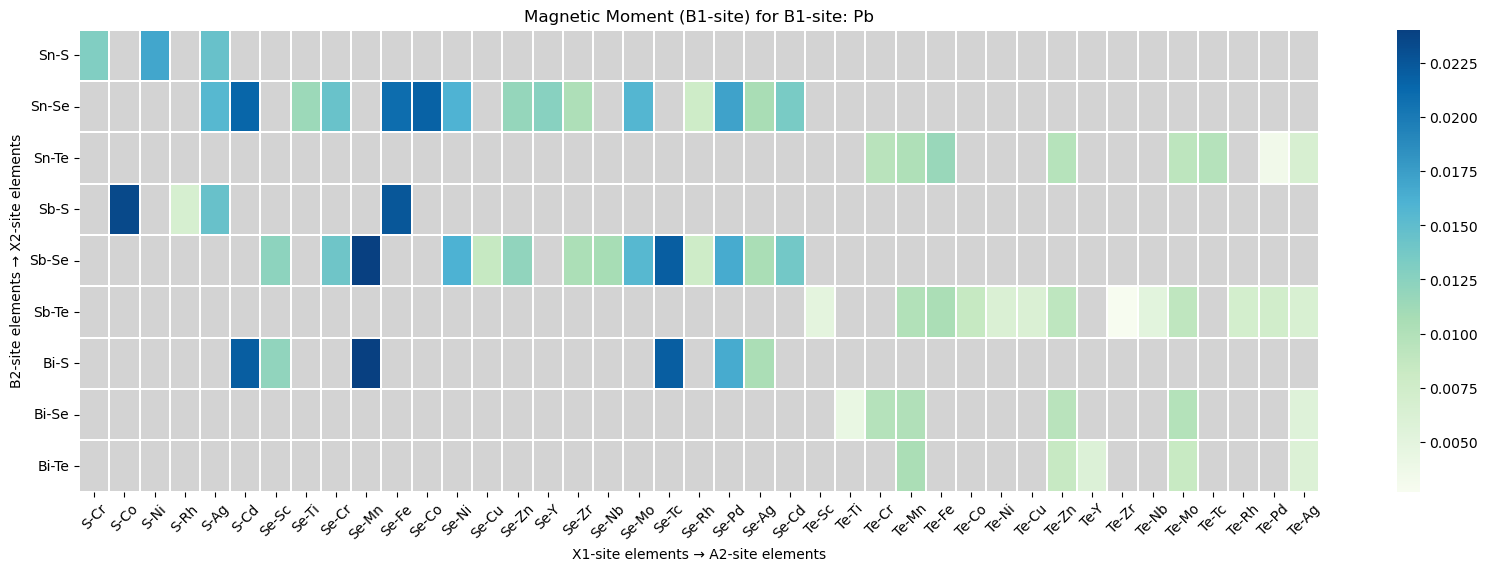

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


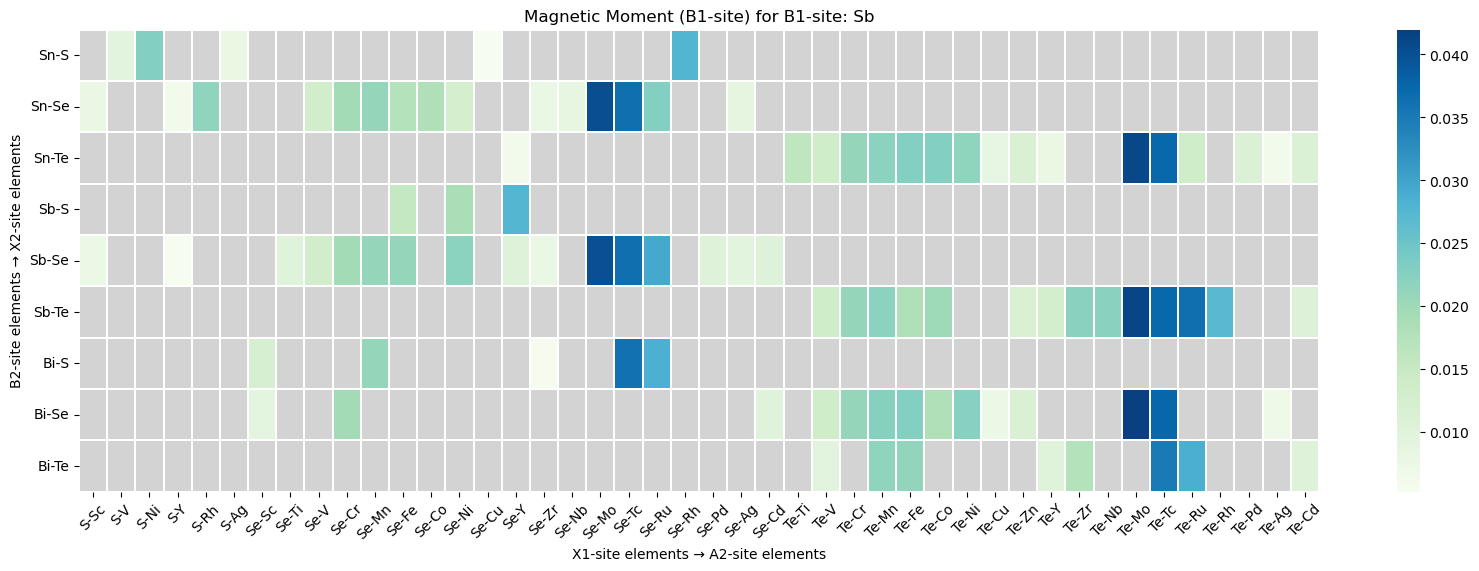

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


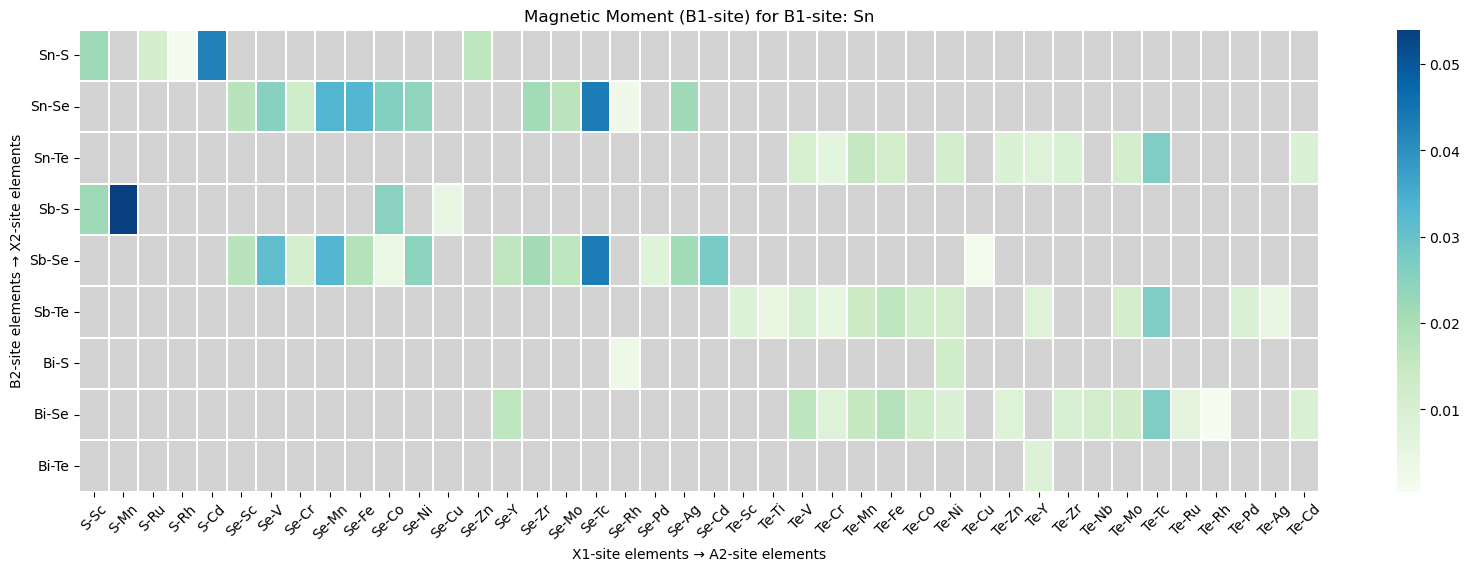

In [38]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_B1', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (B1-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


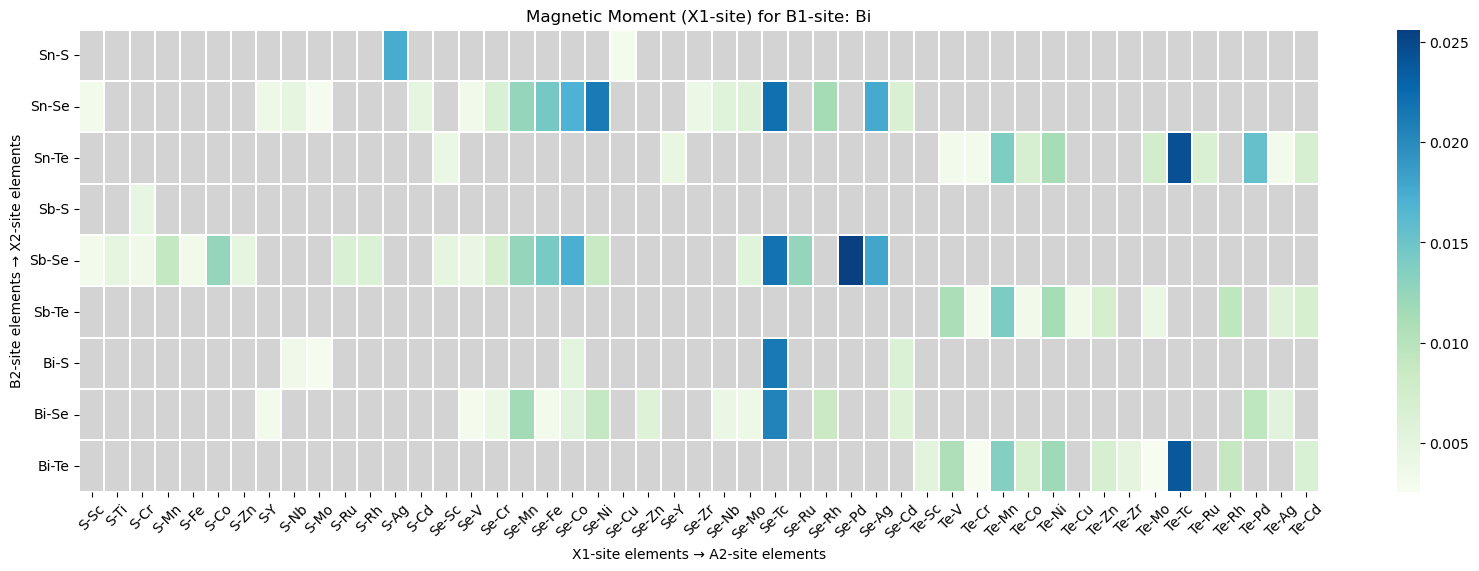

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


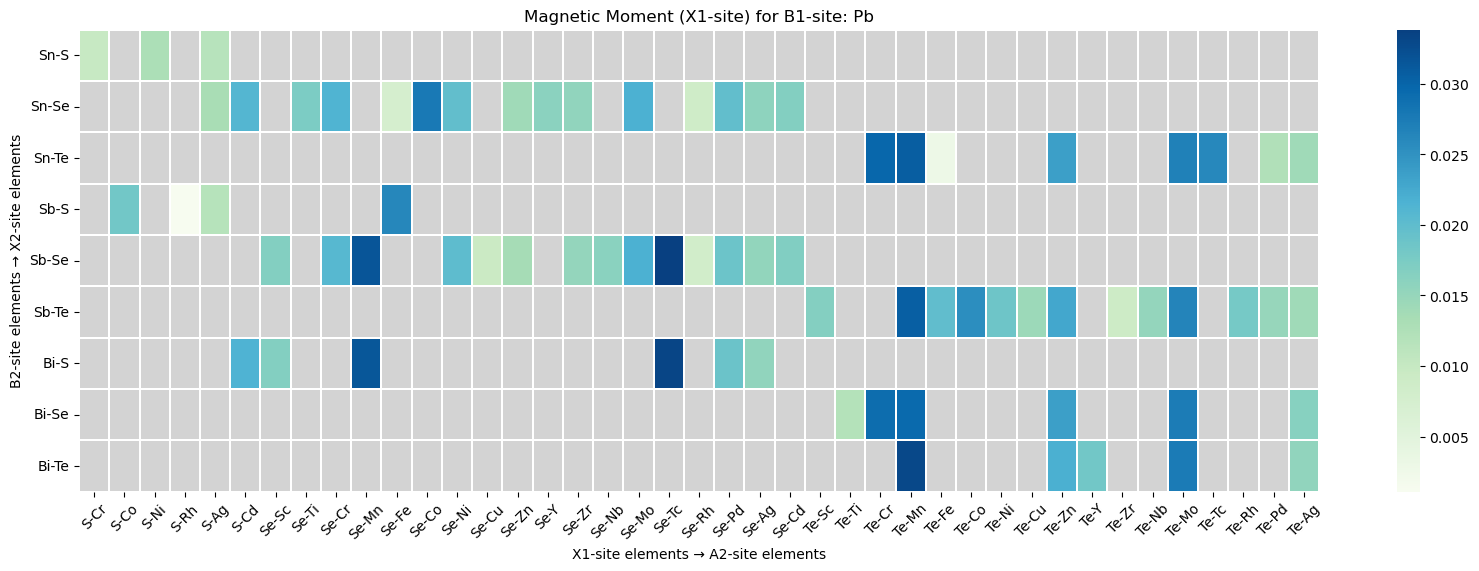

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


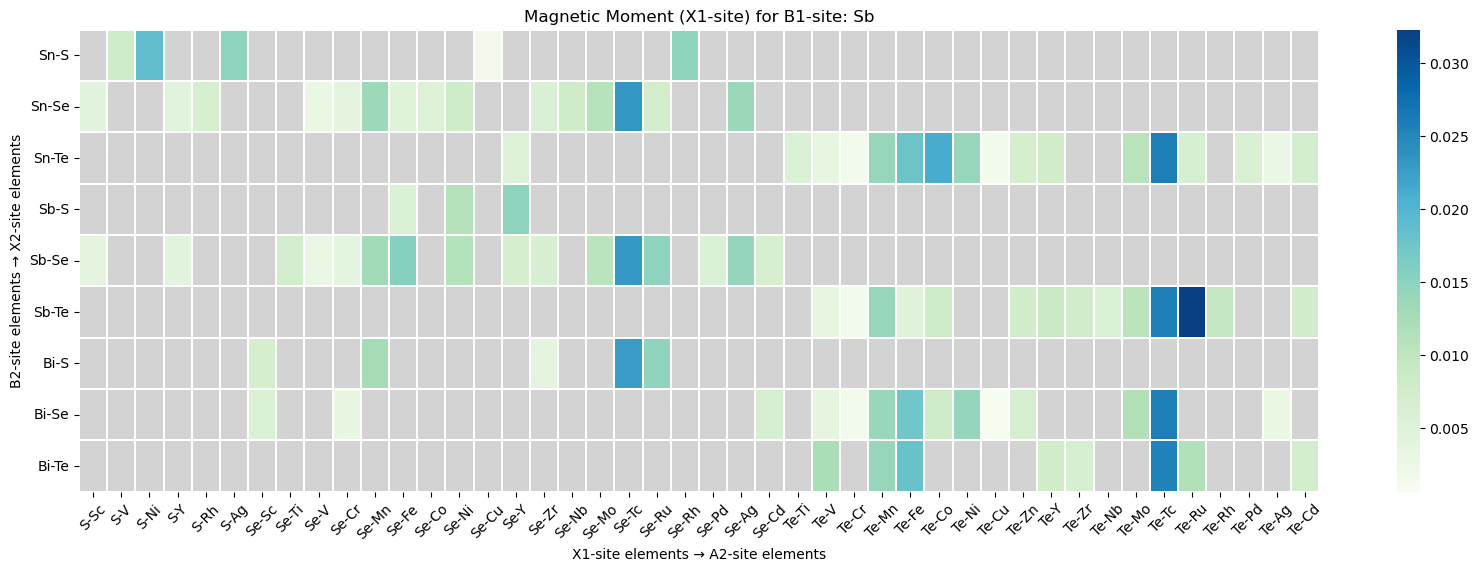

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


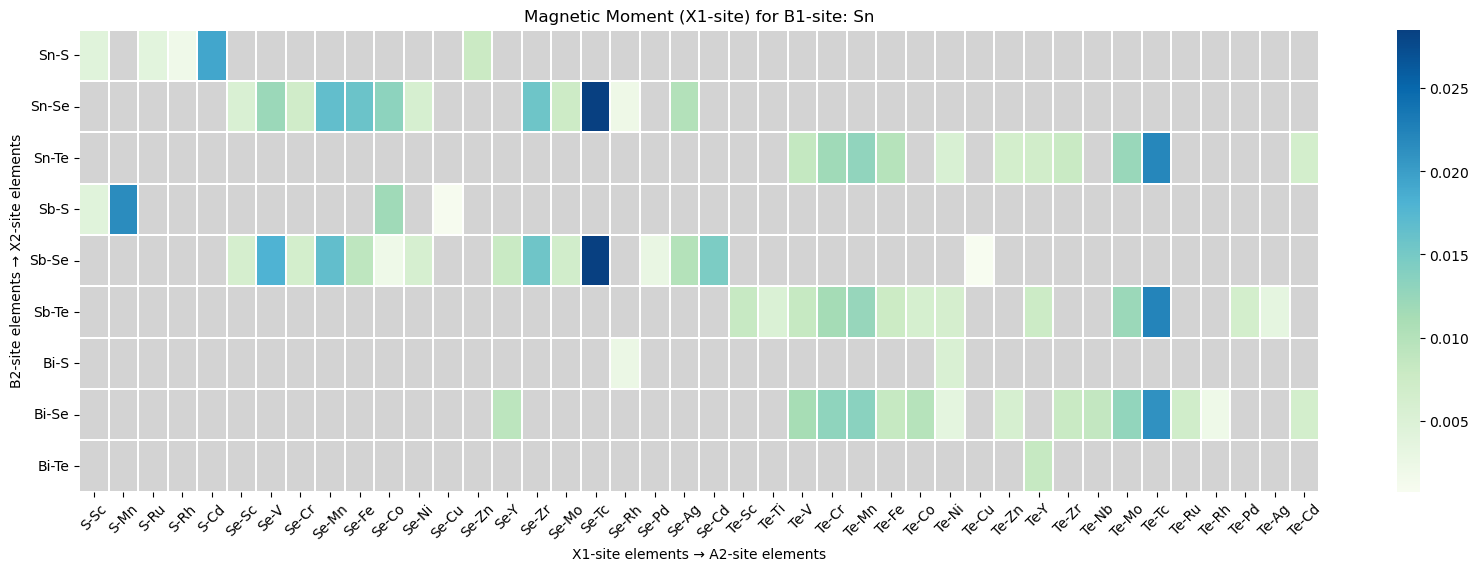

In [44]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_X1', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (X1-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


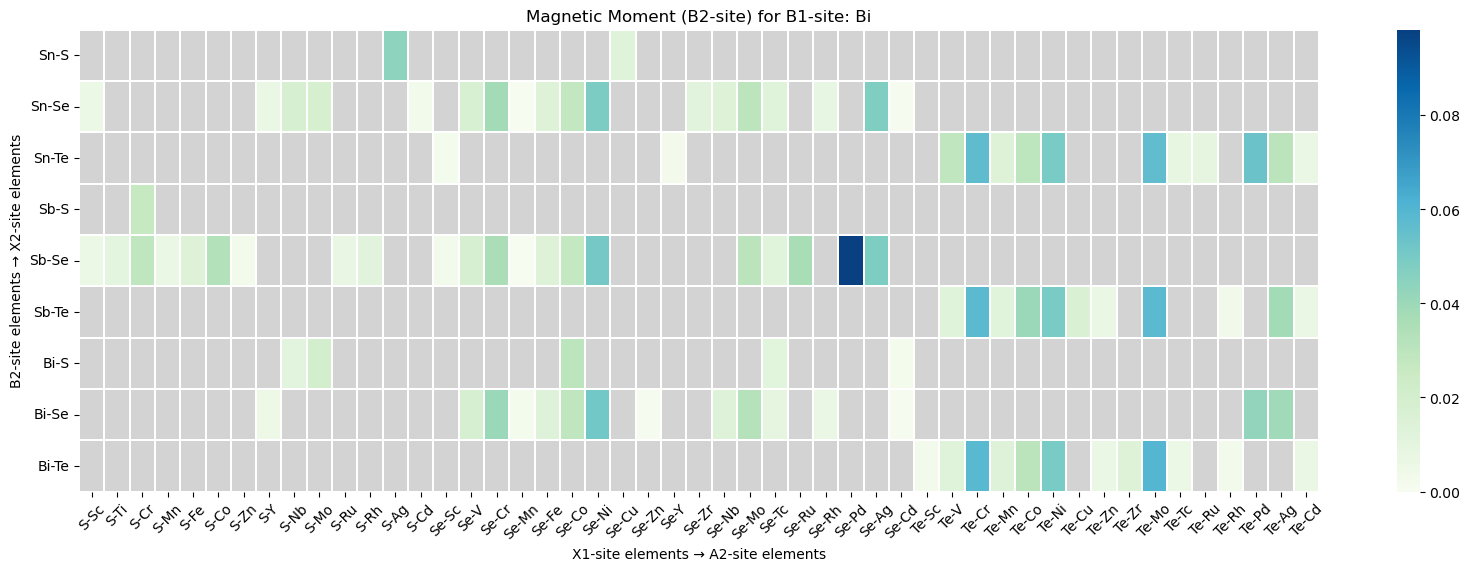

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


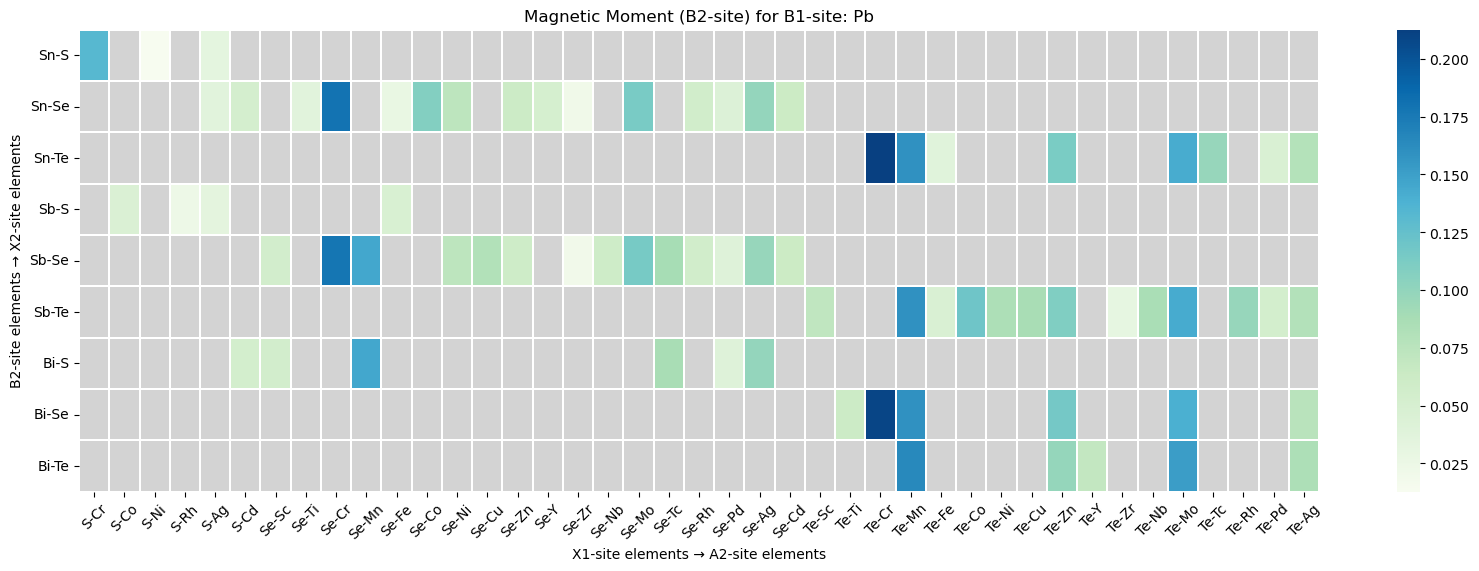

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


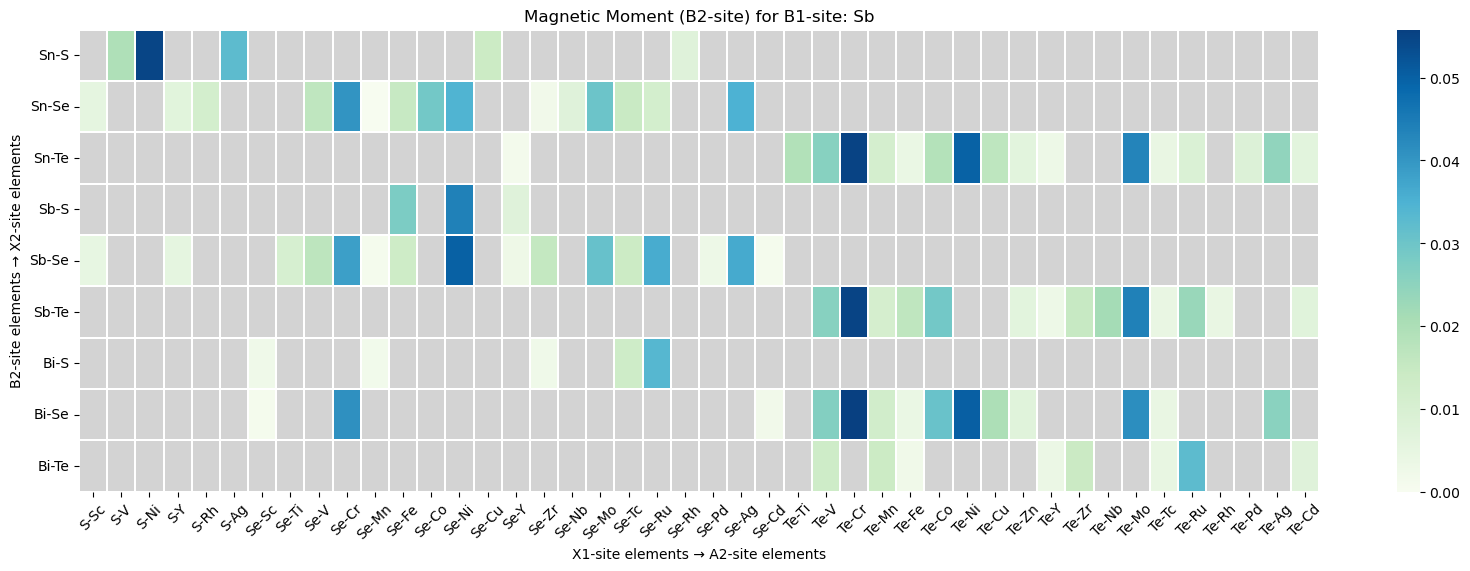

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


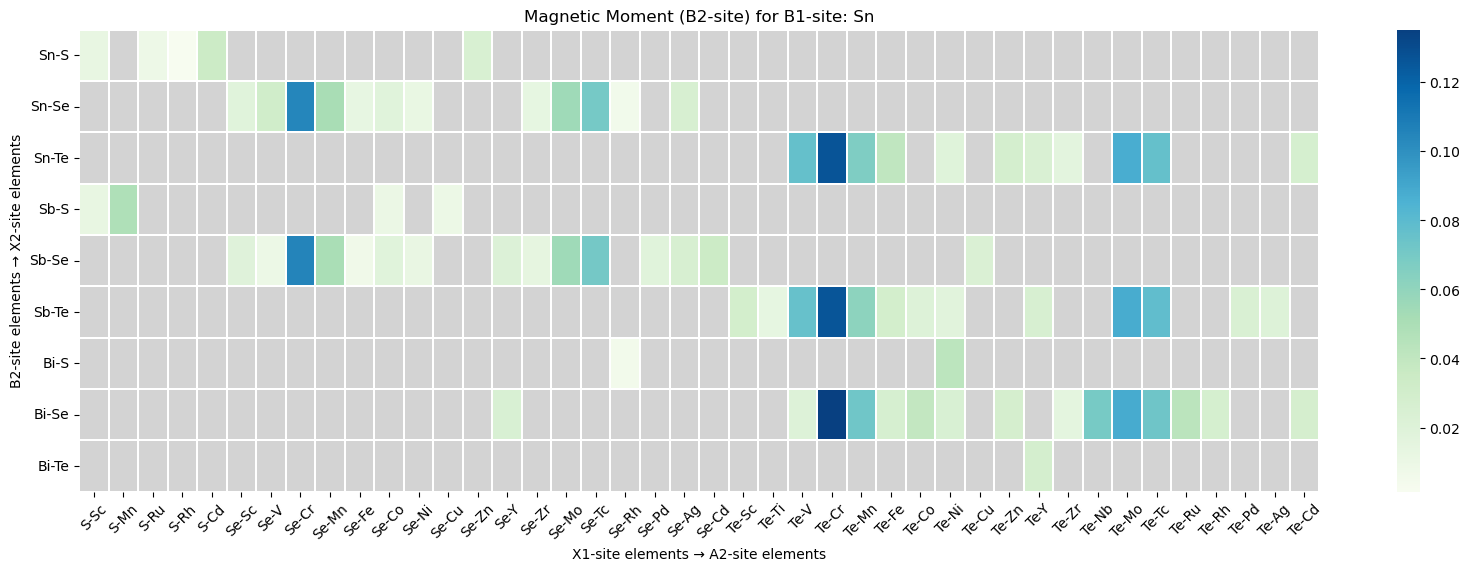

In [34]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_B2', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (B2-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


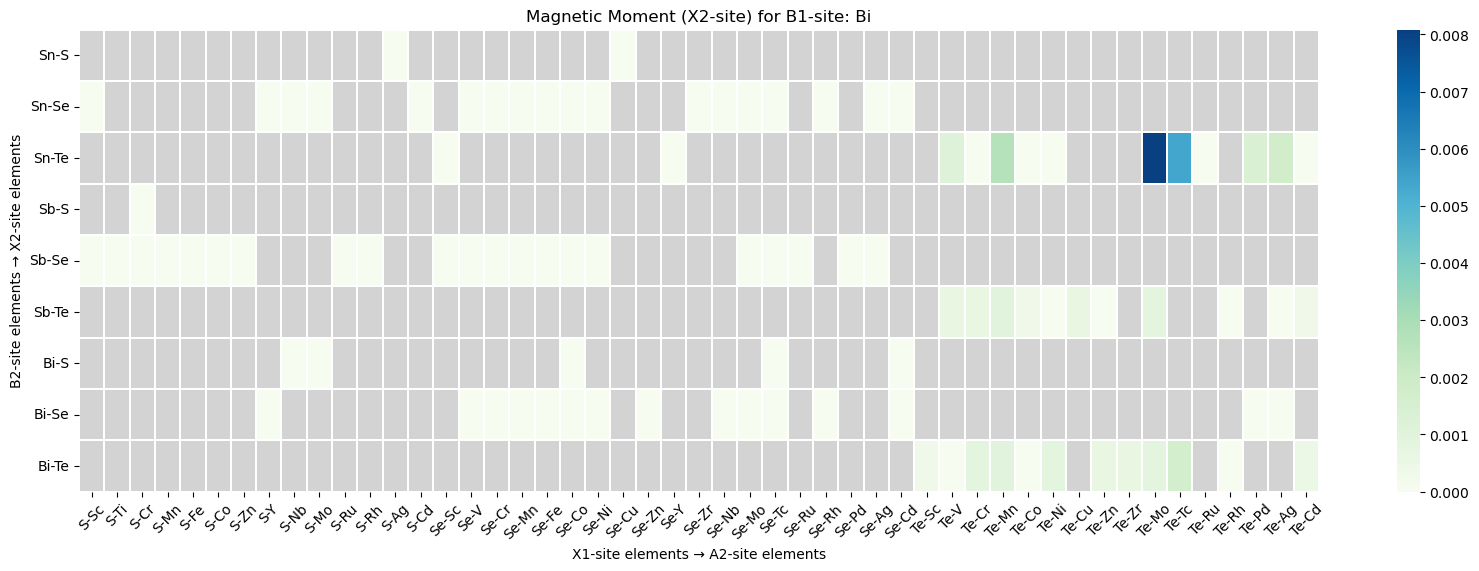

Processing B1-site: Pb, Unique B2 values: ['Sb' 'Sn' 'Bi']


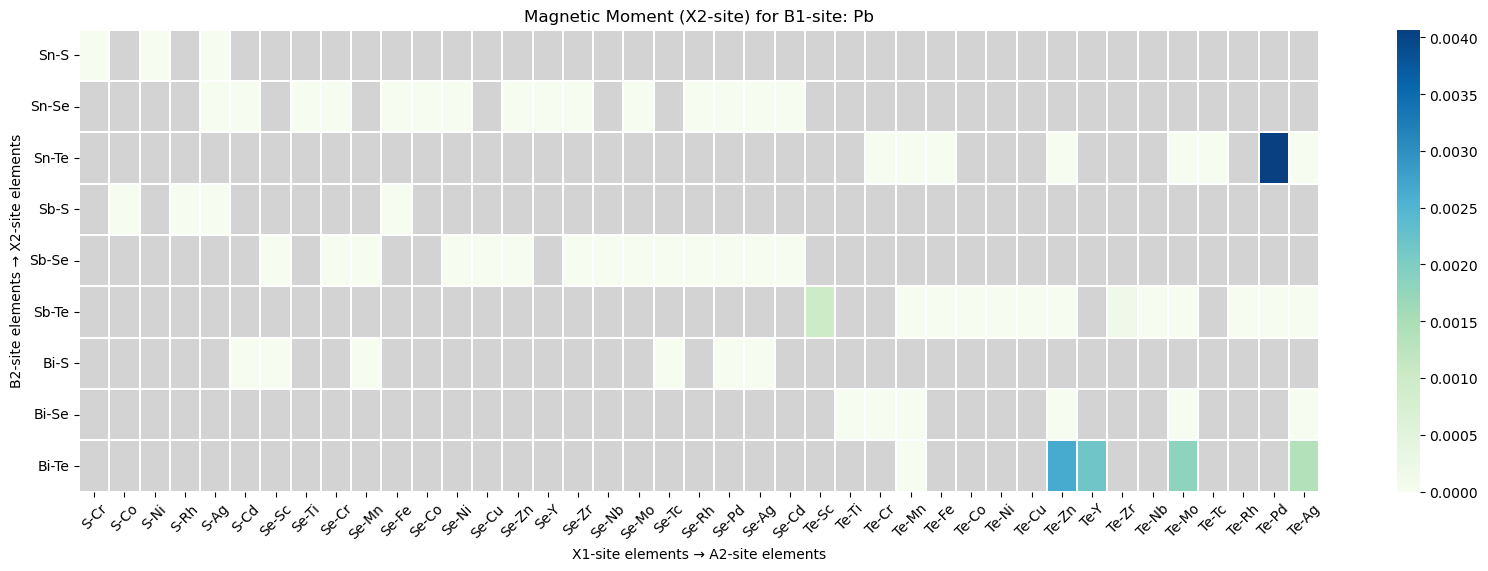

Processing B1-site: Sb, Unique B2 values: ['Sn' 'Sb' 'Bi']


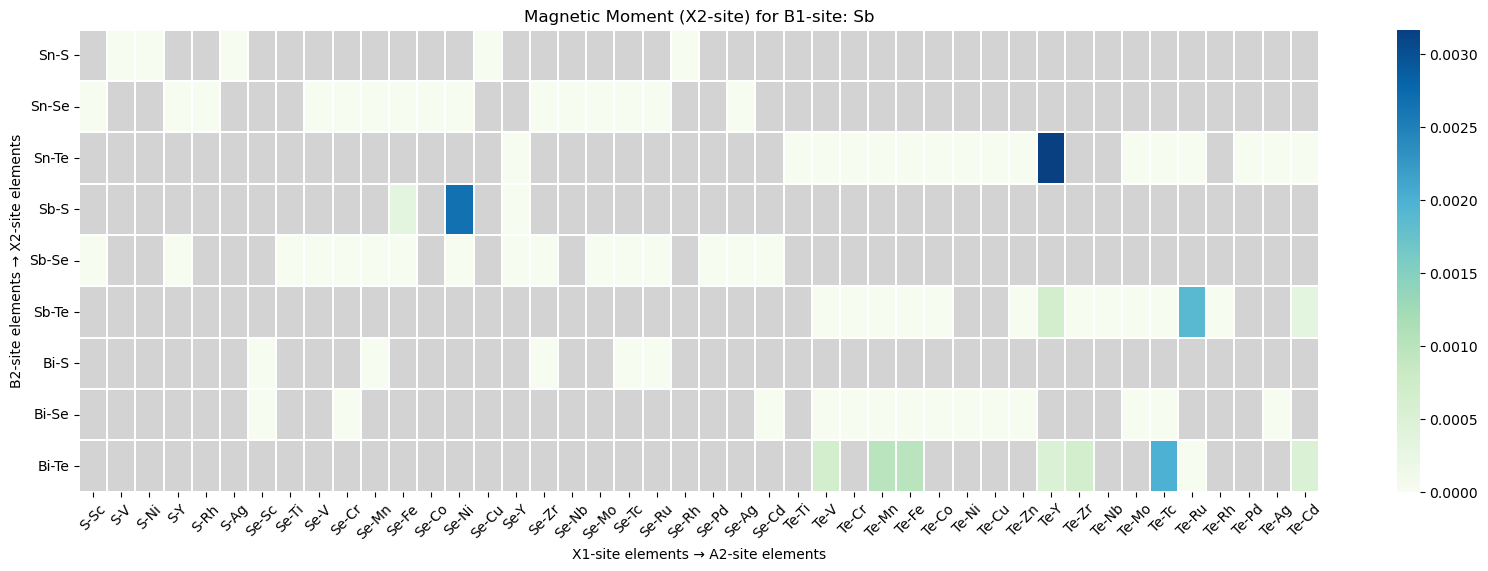

Processing B1-site: Sn, Unique B2 values: ['Sn' 'Bi' 'Sb']


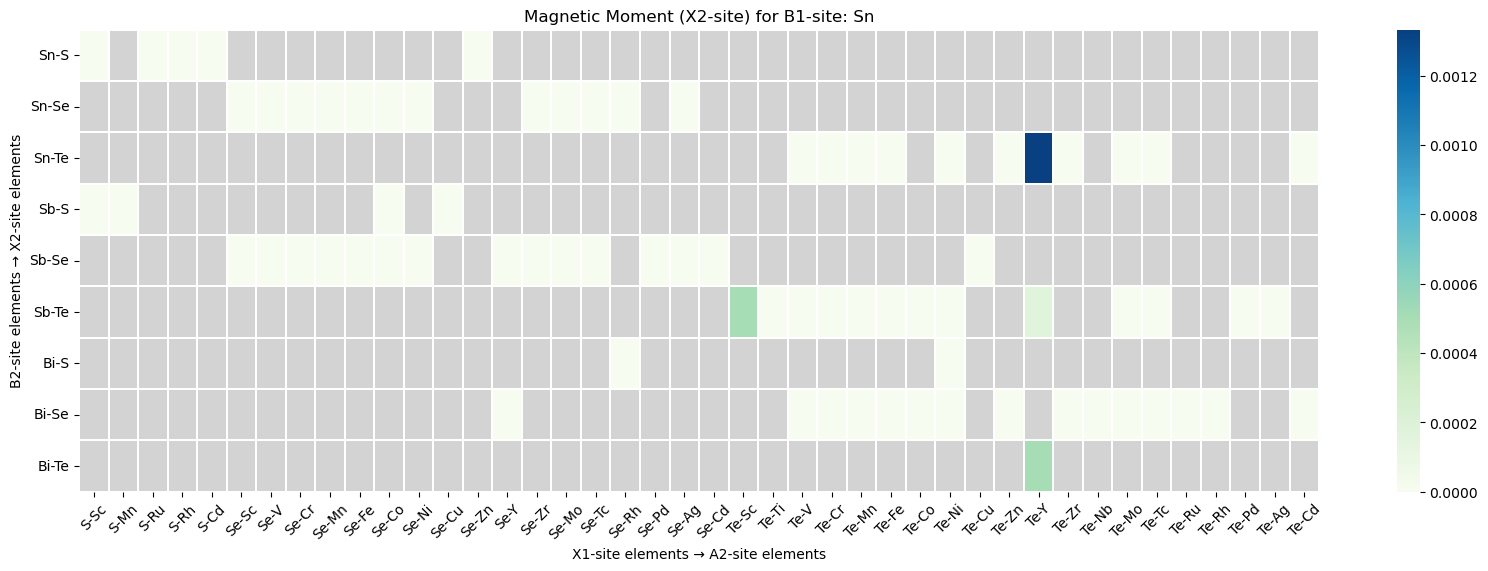

In [36]:
A2_site_mapping = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y',
                                                 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'])}

B1_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}
B2_site_mapping = {i: el for i, el in enumerate(['Sn', 'Sb', 'Pb', 'Bi'])}

X1_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_mapping = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites = sorted(df['B1_site'].unique())

for B1 in unique_B1_sites:
    subset_B1 = df[df['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='mu_X2', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_mapping.get(x1, x1)}-{A2_site_mapping.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_mapping.get(b2, b2)}-{X2_site_mapping.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("GnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Magnetic Moment (X2-site) for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()


In [17]:
## Substrate effect

In [33]:
df_substrate = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','substrate_effect_Bi')

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


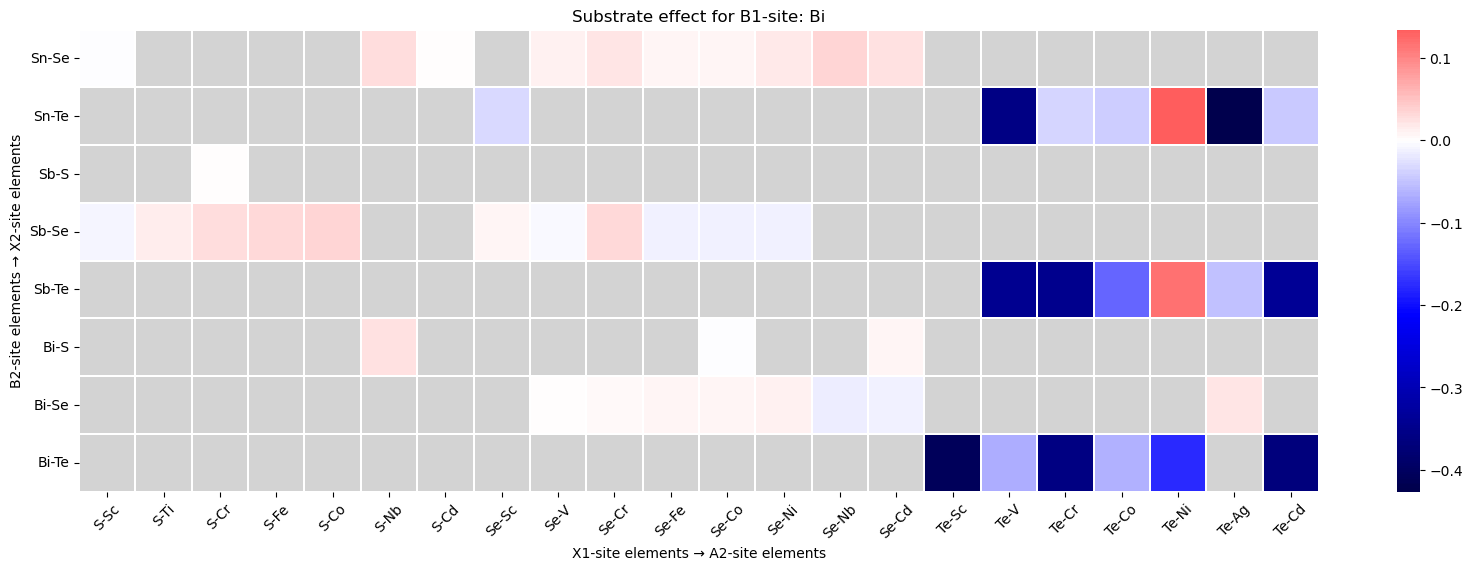

In [30]:
df_substrate[['A2_site', 'B1_site', 'X1_site', 'B2_site', 'X2_site']] = df_substrate['Material'].apply(lambda m: pd.Series(extract_components(m)))

x1_x2_order = {'S': 1, 'Se': 2, 'Te': 3}
df_substrate['X1_site_order'] = df_substrate['X1_site'].map(x1_x2_order)
df_substrate['X2_site_order'] = df_substrate['X2_site'].map(x1_x2_order)

A_site = ['Sc', 'Ti', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Nb', 'Ag', 'Cd']
df_substrate['A2_site_order'] = df_substrate['A2_site'].apply(lambda x: A_site.index(x) if x in A_site else len(A_site))

B2_site_order = ['Sn', 'Sb', 'Bi']
df_substrate['B2_site_order'] = df_substrate['B2_site'].apply(lambda x: B2_site_order.index(x) if x in B2_site_order else len(B2_site_order))

A2_site_substrate = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Nb', 'Ag', 'Cd'])}

B1_site_substrate = {i: el for i, el in enumerate(['Bi'])}
B2_site_substrate = {i: el for i, el in enumerate(['Sn', 'Sb', 'Bi'])}

X1_site_substrate = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_substrate = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites_substrate = sorted(df_substrate['B1_site'].unique())

for B1 in unique_B1_sites_substrate:
    subset_B1 = df_substrate[df_substrate['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='delta Ef', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_substrate.get(x1, x1)}-{A2_site_substrate.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_substrate.get(b2, b2)}-{X2_site_substrate.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("seismic", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, center=0, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Substrate effect for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()

Processing B1-site: Bi, Unique B2 values: ['Sn' 'Bi' 'Sb']


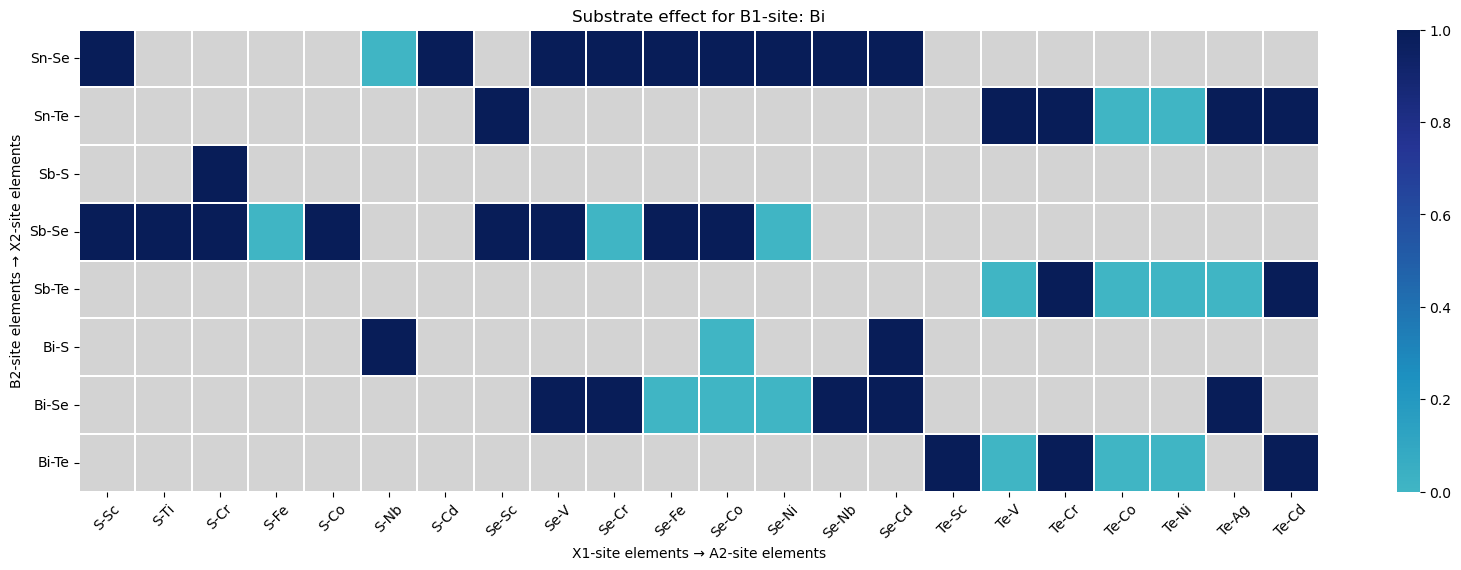

In [36]:
spin_states_substrate = df_substrate['spin state']
df_substrate['numeric_spin_states'] = [1 if x=='FM' else 0 for x in spin_states_substrate]

df_substrate[['A2_site', 'B1_site', 'X1_site', 'B2_site', 'X2_site']] = df_substrate['Material'].apply(lambda m: pd.Series(extract_components(m)))

x1_x2_order = {'S': 1, 'Se': 2, 'Te': 3}
df_substrate['X1_site_order'] = df_substrate['X1_site'].map(x1_x2_order)
df_substrate['X2_site_order'] = df_substrate['X2_site'].map(x1_x2_order)

A_site = ['Sc', 'Ti', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Nb', 'Ag', 'Cd']
df_substrate['A2_site_order'] = df_substrate['A2_site'].apply(lambda x: A_site.index(x) if x in A_site else len(A_site))

B2_site_order = ['Sn', 'Sb', 'Bi']
df_substrate['B2_site_order'] = df_substrate['B2_site'].apply(lambda x: B2_site_order.index(x) if x in B2_site_order else len(B2_site_order))

A2_site_substrate = {i: el for i, el in enumerate(['Sc', 'Ti', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Nb', 'Ag', 'Cd'])}

B1_site_substrate = {i: el for i, el in enumerate(['Bi'])}
B2_site_substrate = {i: el for i, el in enumerate(['Sn', 'Sb', 'Bi'])}

X1_site_substrate = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}
X2_site_substrate = {i+1: el for i, el in enumerate(['S', 'Se', 'Te'])}

unique_B1_sites_substrate = sorted(df_substrate['B1_site'].unique())

for B1 in unique_B1_sites_substrate:
    subset_B1 = df_substrate[df_substrate['B1_site'] == B1]
    
    print(f"Processing B1-site: {B1}, Unique B2 values:", subset_B1['B2_site'].unique())

    pivot = subset_B1.pivot_table(index=['B2_site_order', 'X2_site_order'],
                                  columns=['X1_site_order', 'A2_site_order'],
                                  values='numeric_spin_states', 
                                  aggfunc='mean')

    pivot.columns = [f"{X1_site_substrate.get(x1, x1)}-{A2_site_substrate.get(a2, a2)}" for x1, a2 in pivot.columns]
    pivot.index = [f"{B2_site_substrate.get(b2, b2)}-{X2_site_substrate.get(x2, x2)}" for b2, x2 in pivot.index]

    mask = pivot.isna()
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad(color="lightgray")

    plt.figure(figsize=(20, 6))
    sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, center=0, mask=mask, cmap=cmap, linecolor="white")

    plt.xlabel("X1-site elements → A2-site elements")
    plt.ylabel("B2-site elements → X2-site elements")
    plt.title(f"Substrate effect for B1-site: {B1}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()

In [74]:
df_monolayer = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','spin_states_monolayer')

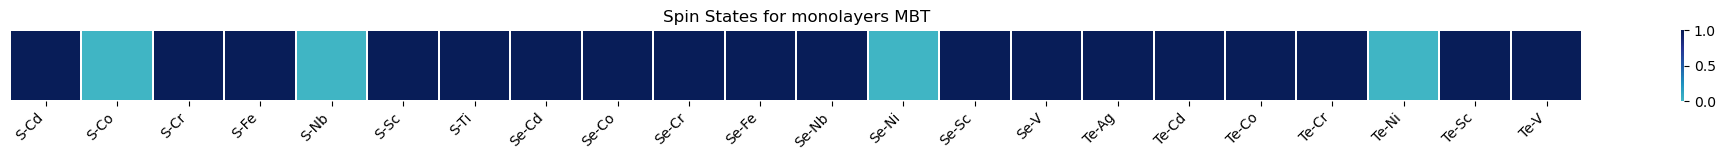

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## monolayer dataset
data = {'X1_A2_site': ['S-Sc','S-Ti','S-Cr','S-Fe','S-Co','S-Nb','S-Cd','Se-Sc','Se-V',
                       'Se-Cr','Se-Fe','Se-Co','Se-Ni','Se-Nb','Se-Cd',
                       'Te-Sc','Te-V','Te-Cr','Te-Co','Te-Ni','Te-Ag','Te-Cd'],
        'spin_states': [1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1]}
df = pd.DataFrame(data)

df['row'] = 'Spin State'  # dummy row label
pivot = df.pivot(index='row', columns='X1_A2_site', values='spin_states')

mask = pivot.isna()
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_bad(color="lightgray")

plt.figure(figsize=(20, 1.7))
sns.heatmap(pivot, annot=False, fmt=".2f", linewidth=0.1, center=0, mask=mask, cmap=cmap, linecolor="white")

plt.xlabel("")
plt.ylabel("")
plt.title("Spin States for monolayers MBT")
plt.xticks(rotation=45, ha='right')
plt.yticks([])  # Hide the single y-axis label
plt.tight_layout()
plt.show()


In [197]:
## Histograms

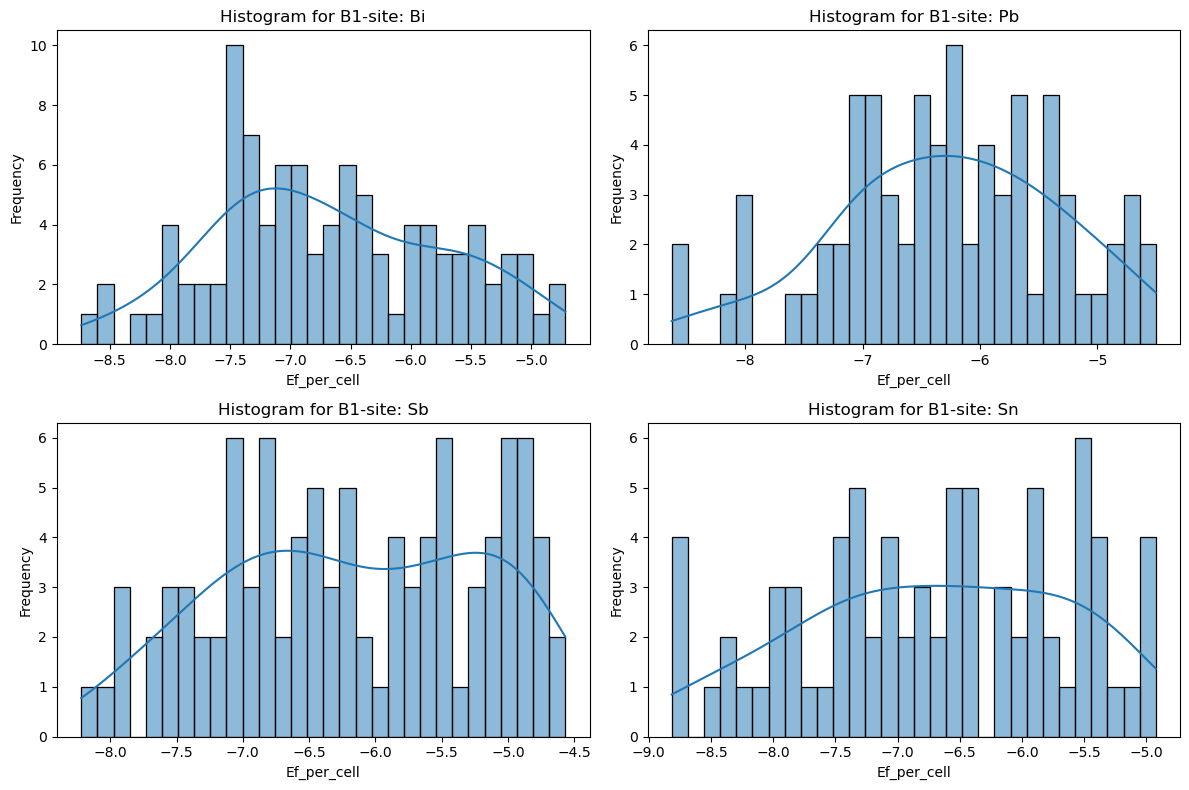

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the dataset by B1_site
grouped = df.groupby("B1_site")

# Set up the figure size and layout
plt.figure(figsize=(12, 8))

# Loop through each unique B1 element and plot a histogram
for i, (B1, group) in enumerate(grouped):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for 4 subplots
    sns.histplot(group['Ef_per_cell'], bins=30, kde=True, edgecolor='black')
    
    plt.xlabel("Ef_per_cell")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for B1-site: {B1}")

plt.tight_layout()
plt.show()

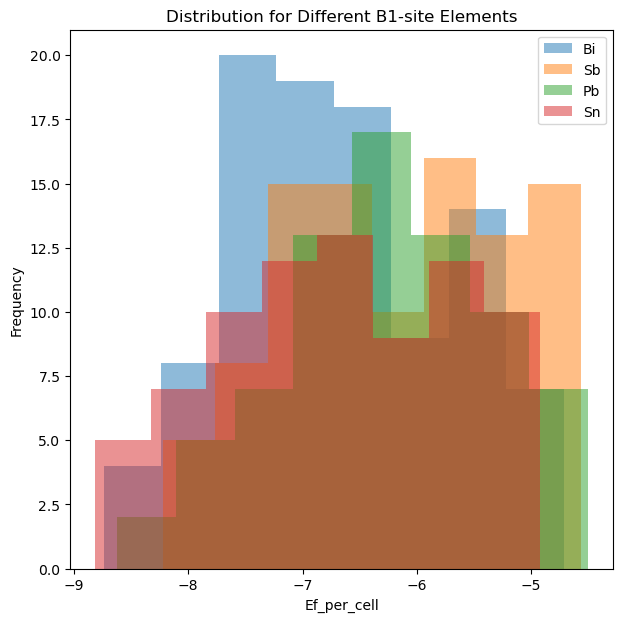

In [210]:
plt.figure(figsize=(7, 7))

for i, B1 in enumerate(df['B1_site'].unique()):
    subset = df[df['B1_site'] == B1]
    sns.histplot(subset['Ef_per_cell'], label=B1, alpha=0.5,edgecolor=None)
plt.xlabel("Ef_per_cell")
plt.ylabel("Frequency")
plt.title("Distribution for Different B1-site Elements")
plt.legend()
plt.show()

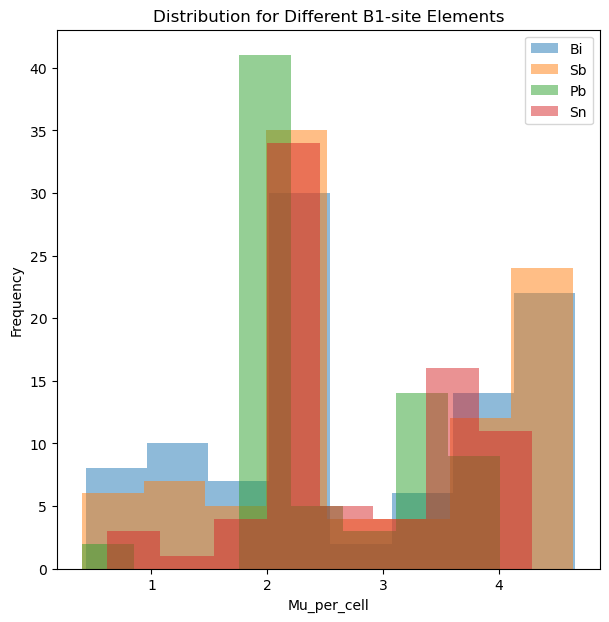

In [209]:
plt.figure(figsize=(7, 7))

for i, B1 in enumerate(df['B1_site'].unique()):
    subset = df[df['B1_site'] == B1]
    sns.histplot(subset['Mu_per_cell'], label=B1, alpha=0.5,edgecolor=None)
plt.xlabel("Mu_per_cell")
plt.ylabel("Frequency")
plt.title("Distribution for Different B1-site Elements")
plt.legend()
plt.show()

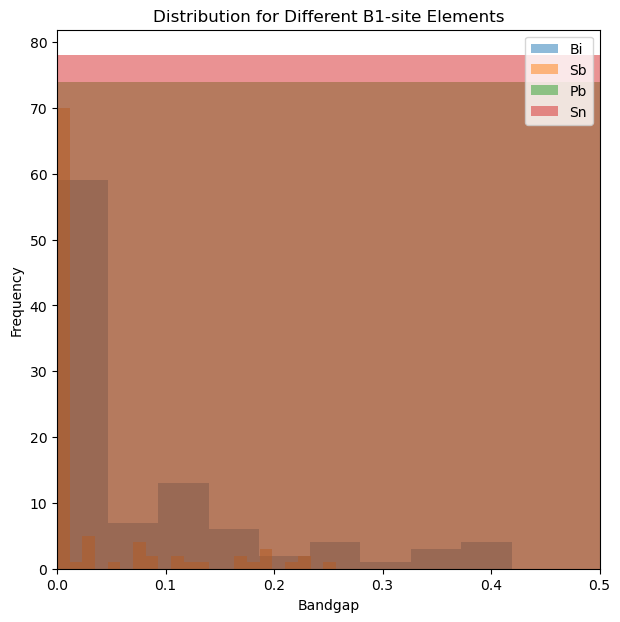

In [212]:
plt.figure(figsize=(7, 7))

for i, B1 in enumerate(df['B1_site'].unique()):
    subset = df[df['B1_site'] == B1]
    sns.histplot(subset['bandgap'], label=B1, alpha=0.5,edgecolor=None)
plt.xlabel("Bandgap")
plt.ylabel("Frequency")
plt.title("Distribution for Different B1-site Elements")
plt.xlim(0,0.5)
plt.legend()
plt.show()

In [99]:
df_Bi = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','B1=Bi')
df_Sb = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','B1=Sb')
df_Sn = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','B1=Sn')
df_Pb = pd.read_excel('for_plots_DFT_D3_hetero_ACS_AMI_348.xlsx','B1=Pb')
df_Bi = df_Bi[abs(df_Bi['MBT_mismatch'])<3]
df_Sb = df_Sb[abs(df_Sb['MBT_mismatch'])<3]
df_Sn = df_Sn[abs(df_Sn['MBT_mismatch'])<3]
df_Pb = df_Pb[abs(df_Pb['MBT_mismatch'])<3]

In [109]:
print(len(df_Bi),'+',len(df_Pb),'+',len(df_Sb),'+',len(df_Sn), ' = ', len(df_Bi)+len(df_Pb)+len(df_Sb)+len(df_Sn))

97 + 73 + 93 + 77  =  340


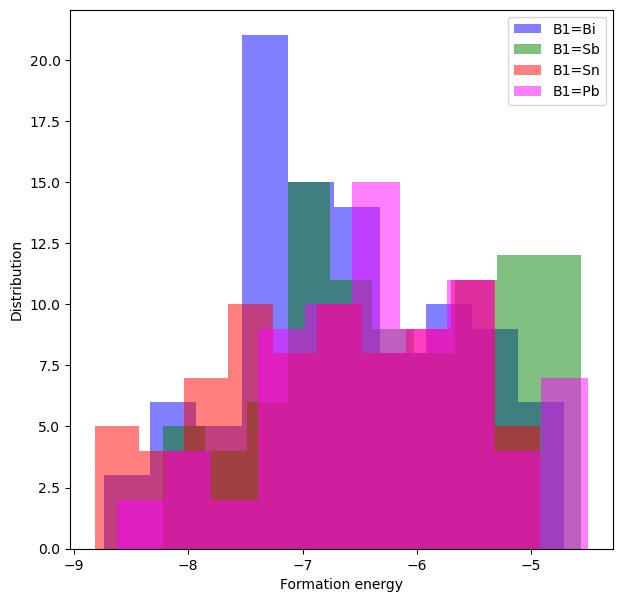

In [100]:
plt.figure(figsize=(7,7))
plt.hist(df_Bi['Ef_per_cell'],alpha=0.5,color='blue',label='B1=Bi')#,density=True)
plt.hist(df_Sb['Ef_per_cell'],alpha=0.5,color='green',label='B1=Sb')#,density=True)
plt.hist(df_Sn['Ef_per_cell'],alpha=0.5,color='red',label='B1=Sn')#,density=True)
plt.hist(df_Pb['Ef_per_cell'],alpha=0.5,color='magenta',label='B1=Pb')#,density=True)
plt.xlabel('Formation energy')
plt.ylabel('Distribution')
plt.legend()
plt.show()

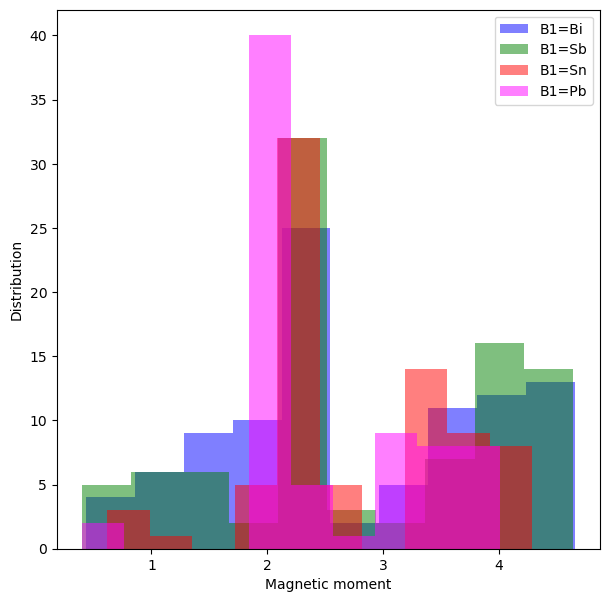

In [101]:
plt.figure(figsize=(7,7))
plt.hist(df_Bi['Mu_per_cell'],alpha=0.5,color='blue',label='B1=Bi')#,density=True)
plt.hist(df_Sb['Mu_per_cell'],alpha=0.5,color='green',label='B1=Sb')#,density=True)
plt.hist(df_Sn['Mu_per_cell'],alpha=0.5,color='red',label='B1=Sn')#,density=True)
plt.hist(df_Pb['Mu_per_cell'],alpha=0.5,color='magenta',label='B1=Pb')#,density=True)
plt.xlabel('Magnetic moment')
plt.ylabel('Distribution')
plt.legend()
plt.show()

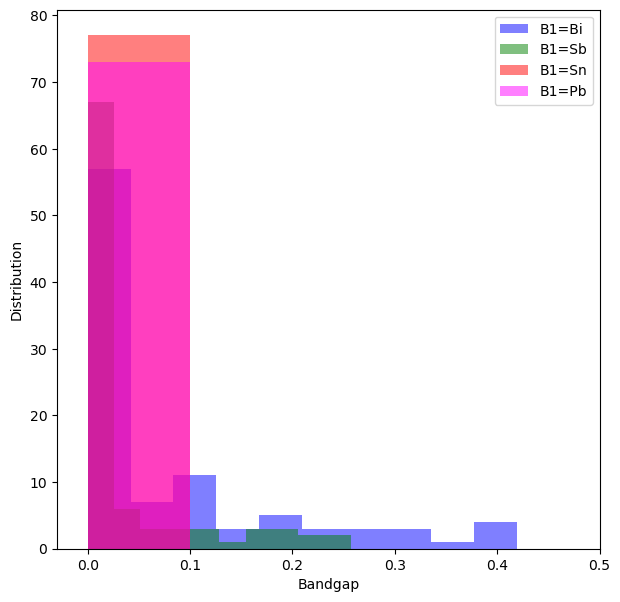

In [102]:
plt.figure(figsize=(7,7))
plt.hist(df_Bi['bandgap'],alpha=0.5,color='blue',label='B1=Bi')#,density=True)
plt.hist(df_Sb['bandgap'],alpha=0.5,color='green',label='B1=Sb')#,density=True)
plt.hist(df_Sn['bandgap'],alpha=0.5,color='red',label='B1=Sn')#,density=True)
plt.hist(df_Pb['bandgap'],alpha=0.5,color='magenta',label='B1=Pb')#,density=True)
plt.xlabel('Bandgap')
plt.ylabel('Distribution')
plt.xlim(-0.03,0.5)
plt.legend()
plt.show()

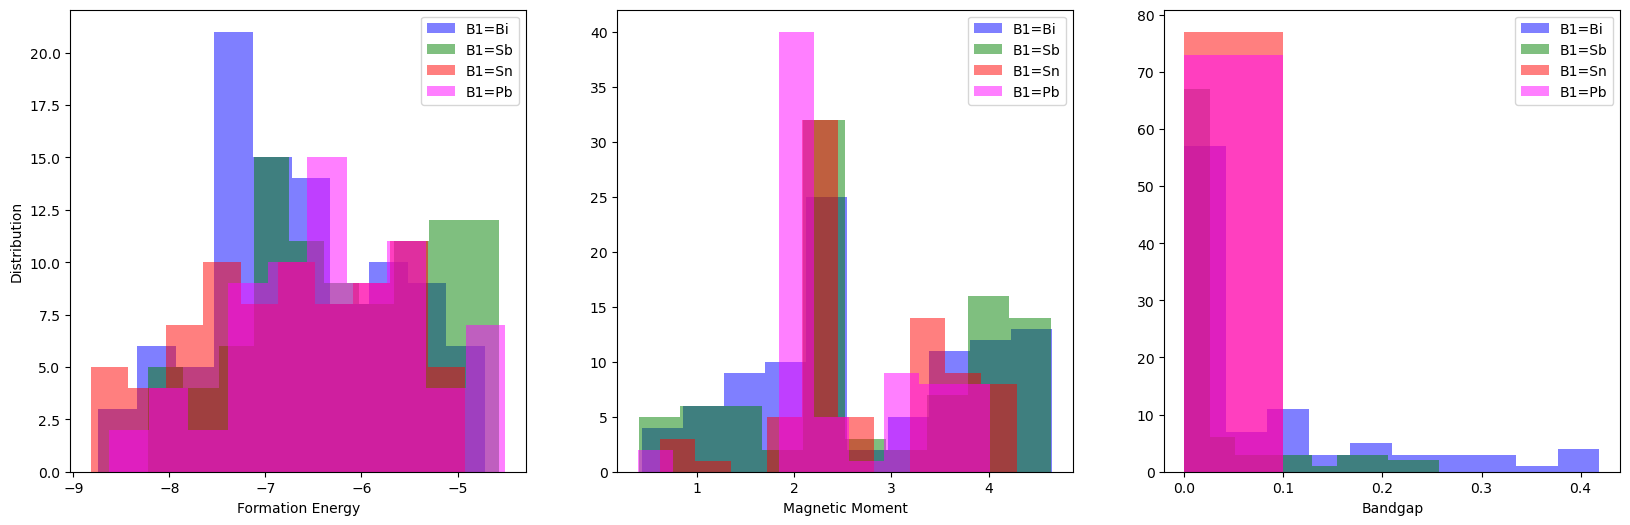

In [126]:
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.hist(df_Bi['Ef_per_cell'],alpha=0.5,color='blue',label='B1=Bi')
ax1.hist(df_Sb['Ef_per_cell'],alpha=0.5,color='green',label='B1=Sb')
ax1.hist(df_Sn['Ef_per_cell'],alpha=0.5,color='red',label='B1=Sn')
ax1.hist(df_Pb['Ef_per_cell'],alpha=0.5,color='magenta',label='B1=Pb')

ax2.hist(df_Bi['Mu_per_cell'],alpha=0.5,color='blue',label='B1=Bi')
ax2.hist(df_Sb['Mu_per_cell'],alpha=0.5,color='green',label='B1=Sb')
ax2.hist(df_Sn['Mu_per_cell'],alpha=0.5,color='red',label='B1=Sn')
ax2.hist(df_Pb['Mu_per_cell'],alpha=0.5,color='magenta',label='B1=Pb')

ax3.hist(df_Bi['bandgap'],alpha=0.5,color='blue',label='B1=Bi')
ax3.hist(df_Sb['bandgap'],alpha=0.5,color='green',label='B1=Sb')
ax3.hist(df_Sn['bandgap'],alpha=0.5,color='red',label='B1=Sn')
ax3.hist(df_Pb['bandgap'],alpha=0.5,color='magenta',label='B1=Pb')

ax1.set_xlabel('Formation Energy')
ax2.set_xlabel('Magnetic Moment')
ax3.set_xlabel('Bandgap')
ax1.set_ylabel('Distribution')
ax1.legend()
ax2.legend()
ax3.legend()
ax3.set_xlim(-0.02,0.44)

plt.show()

In [103]:
## Lattice mismatch

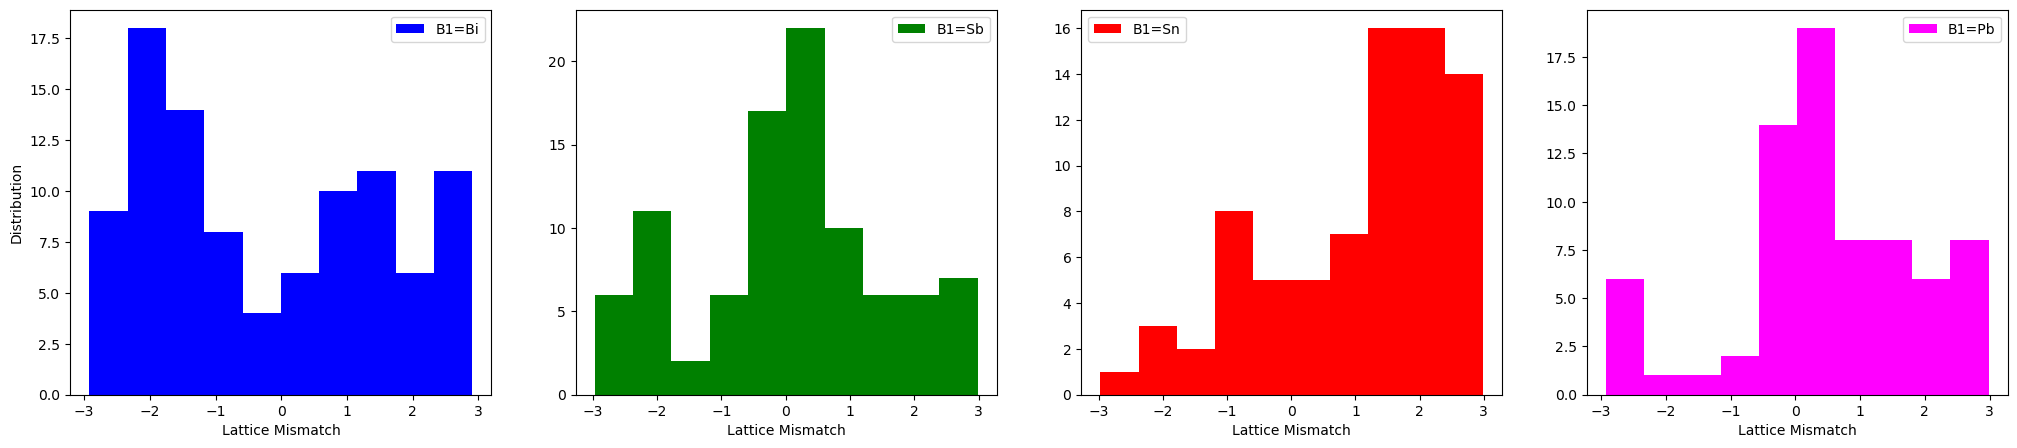

In [115]:
fig,(ax1,ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,5))
ax1.hist(df_Bi['MBT_mismatch'],alpha=1,color='blue',label='B1=Bi')#,density=True)
ax2.hist(df_Sb['MBT_mismatch'],alpha=1,color='green',label='B1=Sb')#,density=True)
ax3.hist(df_Sn['MBT_mismatch'],alpha=1,color='red',label='B1=Sn')#,density=True)
ax4.hist(df_Pb['MBT_mismatch'],alpha=1,color='magenta',label='B1=Pb')#,density=True)
ax1.set_xlabel('Lattice Mismatch')
ax2.set_xlabel('Lattice Mismatch')
ax3.set_xlabel('Lattice Mismatch')
ax4.set_xlabel('Lattice Mismatch')
ax1.set_ylabel('Distribution')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

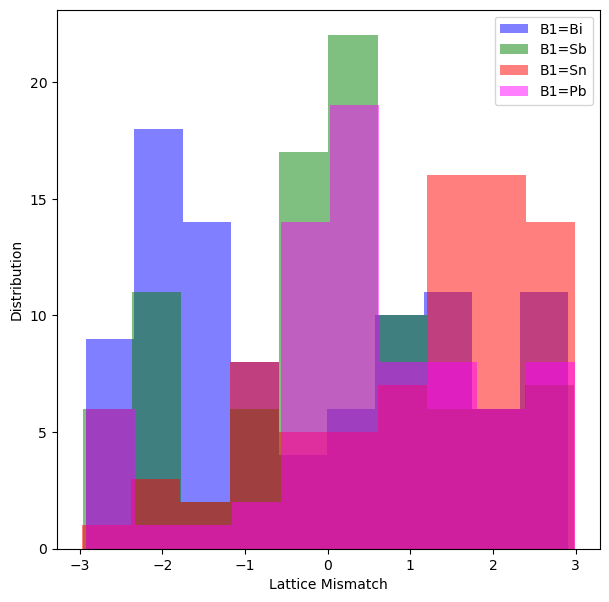

In [128]:
plt.figure(figsize=(7,7))
plt.hist(df_Bi['MBT_mismatch'],alpha=0.5,color='blue',label='B1=Bi')#,density=True)
plt.hist(df_Sb['MBT_mismatch'],alpha=0.5,color='green',label='B1=Sb')#,density=True)
plt.hist(df_Sn['MBT_mismatch'],alpha=0.5,color='red',label='B1=Sn')#,density=True)
plt.hist(df_Pb['MBT_mismatch'],alpha=0.5,color='magenta',label='B1=Pb')#,density=True)
plt.xlabel('Lattice Mismatch')
plt.ylabel('Distribution')
plt.legend()
plt.show()

## Comparison of heterostructures with monolayer dataset

In [119]:
## Formation energy difference plot

In [39]:
# fig,ax=plt.subplots(figsize=(18,12))
# sns.heatmap(Ef_Bi_dE_new,cmap="seismic", vmin=-0.65, vmax=0.80,linewidth=0.1)
# plt.title("Formation energy of MBT monolayers and their heterostructures (B1 = Bi)")
# plt.show()

In [156]:
## Plot of Magnetic States comparison

In [41]:
# fig,ax=plt.subplots(figsize=(18,12))
# sns.heatmap(State_Sn_comp_num, cmap="YlGnBu",linewidth=0.1)
# plt.title("Magnetic States comparison in MBT monolayers and their heterostructures (B1 = Sn)")
# plt.show()

## Plots of ML data

In [70]:
## Formation energy FFNN

In [97]:
y_train_ffnn_ef = pd.read_csv('Results_Ef/y_train_FFNN.csv')
y_test_ffnn_ef = pd.read_csv('Results_Ef/y_test_FFNN.csv')
pred_y_train_ffnn_ef = pd.read_csv('Results_Ef/y_pred_284_train.csv')
pred_y_test_ffnn_ef = pd.read_csv('Results_Ef/y_pred_284_test.csv')

In [98]:
print('R2 score of training set:',metrics.r2_score(y_train_ffnn_ef['55'], pred_y_train_ffnn_ef))
print('R2 score of test set:',metrics.r2_score(y_test_ffnn_ef['55'], pred_y_test_ffnn_ef))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_ffnn_ef['55'], pred_y_train_ffnn_ef))
print('MAE of test set:',metrics.mean_absolute_error(y_test_ffnn_ef['55'], pred_y_test_ffnn_ef))

R2 score of training set: 0.9910392539978359
R2 score of test set: 0.9623247174939284

MAE of training set: 0.0690421252139434
MAE of test set: 0.16137322241428384


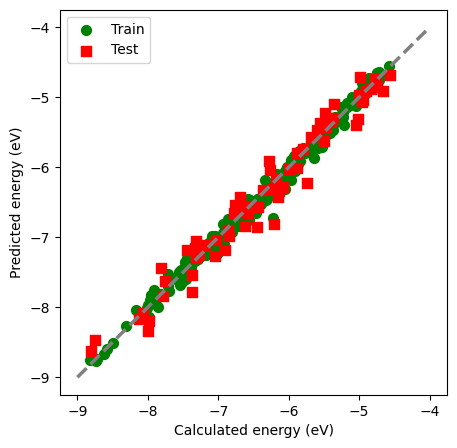

In [99]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_ffnn_ef['55'], pred_y_train_ffnn_ef,label='Train' ,marker='o',color='green',s=50)
plt.scatter(y_test_ffnn_ef['55'], pred_y_test_ffnn_ef,label='Test',marker='s',color='red',s=50)
plt.xlabel('Calculated energy (eV)')
plt.ylabel('Predicted energy (eV)')
plt.plot([-9,-4], [-9,-4],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

In [1]:
## formation energy RF (input data are same for both RF and FFNN)

In [100]:
y_train_RF_ef = pd.read_csv('Results_Ef/y_train_FFNN.csv')
y_test_RF_ef = pd.read_csv('Results_Ef/y_test_FFNN.csv')
pred_y_train_RF_ef = pd.read_csv('Results_Ef/y_pred_train_ef_RF_hp.csv')
pred_y_test_RF_ef = pd.read_csv('Results_Ef/y_pred_test_ef_RF_hp.csv')

In [101]:
print('R2 score of training set:',metrics.r2_score(y_train_ffnn_ef['55'], pred_y_train_RF_ef))
print('R2 score of test set:',metrics.r2_score(y_test_ffnn_ef['55'], pred_y_test_RF_ef))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_ffnn_ef['55'], pred_y_train_RF_ef))
print('MAE of test set:',metrics.mean_absolute_error(y_test_ffnn_ef['55'], pred_y_test_RF_ef))

R2 score of training set: 0.9853160740961735
R2 score of test set: 0.9107741332568193

MAE of training set: 0.08496274624172263
MAE of test set: 0.24205492517434288


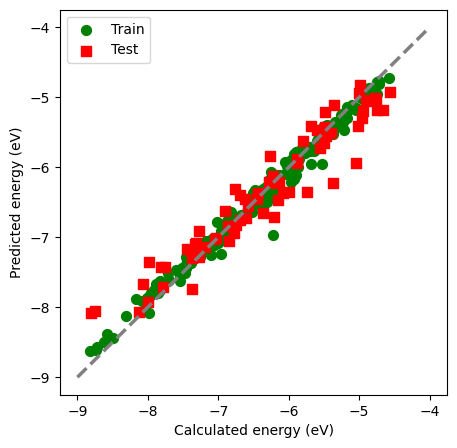

In [102]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_RF_ef['55'], pred_y_train_RF_ef,label='Train' ,marker='o',color='green',s=50)
plt.scatter(y_test_RF_ef['55'], pred_y_test_RF_ef,label='Test',marker='s',color='red',s=50)
plt.xlabel('Calculated energy (eV)')
plt.ylabel('Predicted energy (eV)')
plt.plot([-9,-4], [-9,-4],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

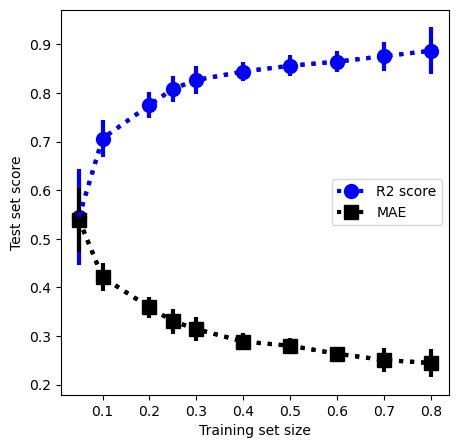

In [103]:
train_test_size_ef = pd.read_csv('Results_Ef/training_set_size_RF_ef.csv')
plt.figure(figsize=(5,5))
plot(train_test_size_ef['split_ratio'], train_test_size_ef['avg_test_R2_score'], linewidth= 3, color='blue', marker = 'o', linestyle='dotted', label = 'R2 score', markersize=10)
errorbar(train_test_size_ef['split_ratio'], train_test_size_ef['avg_test_R2_score'], linewidth= 3, color='blue', yerr = train_test_size_ef['std_test_R2_score'], linestyle='dotted')
plot(train_test_size_ef['split_ratio'], train_test_size_ef['avg_test_MAE_score'], linewidth= 3, color='black', marker='s', linestyle='dotted', label = 'MAE', markersize=10)
errorbar(train_test_size_ef['split_ratio'], train_test_size_ef['avg_test_MAE_score'], linewidth= 3, color='black', yerr = train_test_size_ef['std_test_MAE_score'], linestyle='dotted')
plt.xlabel('Training set size')
plt.ylabel('Test set score')
plt.legend(loc='center right')
plt.show()

In [104]:
features_RF_ef = pd.read_csv('Results_Ef/feature_importance_ef_RF_hp.csv')

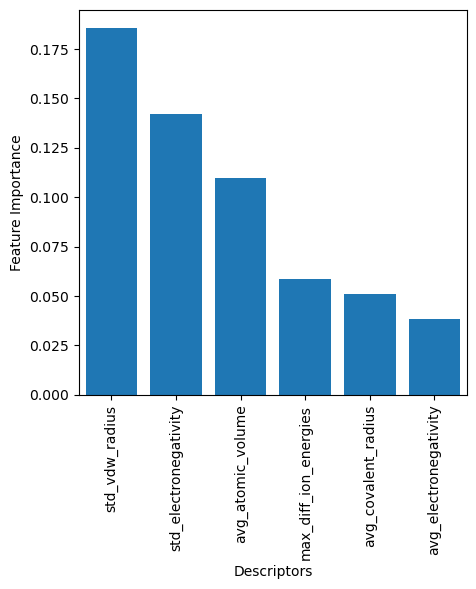

In [120]:
plt.figure(figsize=(5,5))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(6), features_RF_ef['importance'][:6], align='center')
plt.xticks(range(6), features_RF_ef['feature'][:6],  rotation=90)
plt.xlim([-0.5, 5.5])
plt.show()

In [106]:
## for magnetic states classification: see Mag_States_Classification_XGBoost.ipynb

In [122]:
## Magnetic moment FFNN

In [2]:
y_train_ffnn_mu = pd.read_csv('Results_Mu/optuna_y_train_52.csv')
y_test_ffnn_mu = pd.read_csv('Results_Mu/optuna_y_test_52.csv')

pred_y_train_ffnn_mu = pd.read_csv('Results_Mu/optuna_y_pred_train_52_10.csv')
pred_y_test_ffnn_mu = pd.read_csv('Results_Mu/optuna_y_pred_test_52_10.csv') 

In [3]:
print('R2 score of training set:',metrics.r2_score(y_train_ffnn_mu, pred_y_train_ffnn_mu))
print('R2 score of test set:',metrics.r2_score(y_test_ffnn_mu, pred_y_test_ffnn_mu))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_ffnn_mu, pred_y_train_ffnn_mu))
print('MAE of test set:',metrics.mean_absolute_error(y_test_ffnn_mu, pred_y_test_ffnn_mu))

R2 score of training set: 0.9803266966876523
R2 score of test set: 0.9538937482975581

MAE of training set: 0.0723412624277707
MAE of test set: 0.12581298868806795


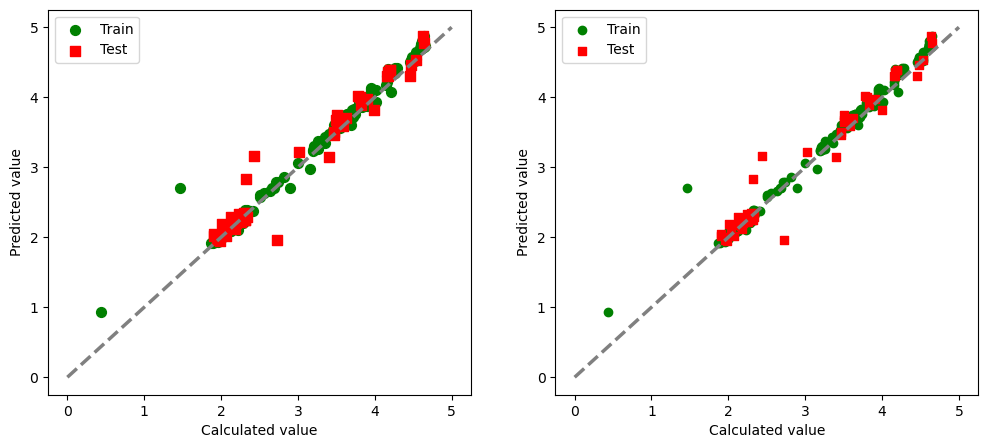

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.scatter(y_train_ffnn_mu, pred_y_train_ffnn_mu,label='Train' ,marker='o',color='green',s=50)
ax1.scatter(y_test_ffnn_mu, pred_y_test_ffnn_mu,label='Test',marker='s',color='red',s=50)
ax1.set_xlabel('Calculated value')
ax1.set_ylabel('Predicted value')
ax1.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
ax1.legend()

ax2.scatter(y_train_ffnn_mu, pred_y_train_ffnn_mu,label='Train' ,marker='o',color='green')
ax2.scatter(y_test_ffnn_mu, pred_y_test_ffnn_mu,label='Test',marker='s',color='red')
ax2.set_xlabel('Calculated value')
ax2.set_ylabel('Predicted value')
ax2.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
ax2.legend()

plt.show()

In [123]:
## Magnetic moment XGB

In [8]:
y_train_XGB_mu = pd.read_excel('Results_Mu/y_52_BE_train_Optuna.xlsx')
y_test_XGB_mu = pd.read_excel('Results_Mu/y_52_BE_test_Optuna.xlsx')

pred_y_train_XGB_mu = pd.read_excel('Results_Mu/y_52_BE_pred_train_Optuna_9_BEST.xlsx')
pred_y_test_XGB_mu = pd.read_excel('Results_Mu/y_52_BE_pred_test_Optuna_9_BEST.xlsx')

In [10]:
print('R2 score of training set:',metrics.r2_score(y_train_XGB_mu, pred_y_train_XGB_mu))
print('R2 score of test set:',metrics.r2_score(y_test_XGB_mu, pred_y_test_XGB_mu))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_XGB_mu, pred_y_train_XGB_mu))
print('MAE of test set:',metrics.mean_absolute_error(y_test_XGB_mu, pred_y_test_XGB_mu))

R2 score of training set: 0.9915719404015021
R2 score of test set: 0.9613337694588071

MAE of training set: 0.03739135712695694
MAE of test set: 0.09509735402517569


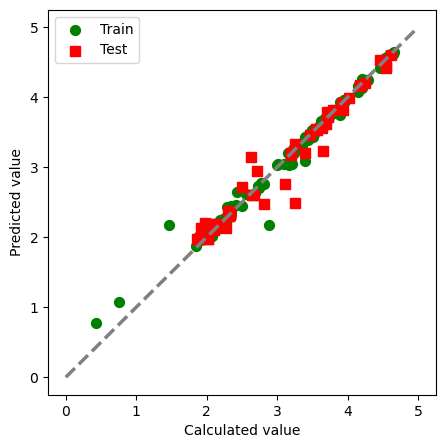

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_XGB_mu, pred_y_train_XGB_mu,label='Train' ,marker='o',color='green',s=50)
plt.scatter(y_test_XGB_mu, pred_y_test_XGB_mu,label='Test',marker='s',color='red',s=50)
plt.xlabel('Calculated value')
plt.ylabel('Predicted value')
plt.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

In [95]:
## Bandgap FFNN

In [30]:
y_train_ffnn_eg = pd.read_csv('Results_Eg/y_train_153.csv')
y_test_ffnn_eg = pd.read_csv('Results_Eg/y_test_153.csv')

pred_y_train_ffnn_eg = pd.read_csv('Results_Eg/y_pred_569_train.csv')
pred_y_test_ffnn_eg = pd.read_csv('Results_Eg/y_pred_569_test.csv')

In [31]:
print('R2 score of training set:',metrics.r2_score(y_train_ffnn_eg['57'], pred_y_train_ffnn_eg))
print('R2 score of test set:',metrics.r2_score(y_test_ffnn_eg['57'], pred_y_test_ffnn_eg))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_ffnn_eg['57'], pred_y_train_ffnn_eg))
print('MAE of test set:',metrics.mean_absolute_error(y_test_ffnn_eg['57'], pred_y_test_ffnn_eg))

R2 score of training set: 0.9869950250225332
R2 score of test set: 0.9150680117563355

MAE of training set: 0.003585794710576968
MAE of test set: 0.005020215151428573


<Figure size 500x500 with 0 Axes>

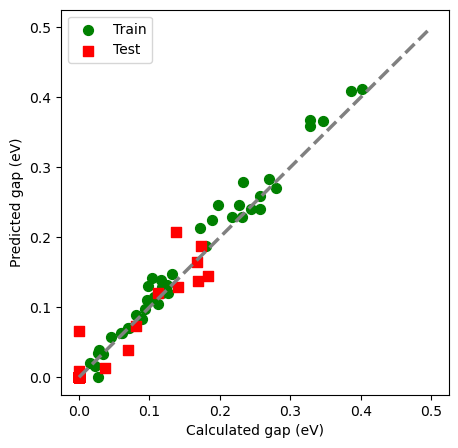

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_ffnn_eg['57'], pred_y_train_ffnn_eg,label='Train' ,marker='o',color='green',s=50)
plt.scatter(y_test_ffnn_eg['57'], pred_y_test_ffnn_eg,label='Test',marker='s',color='red',s=50)
plt.xlabel('Calculated gap (eV)')
plt.ylabel('Predicted gap (eV)')
plt.plot([0,0.5], [0,0.5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

In [113]:
## Bandgap RF regression, datasets for the FFNN and RF are the same

In [8]:
y_train_RF_eg = pd.read_csv('Results_Eg/y_train_153.csv')
y_test_RF_eg = pd.read_csv('Results_Eg/y_test_153.csv')

pred_y_train_RF_eg = pd.read_csv('Results_Eg/y_pred_train_eg_RF_hp_22.csv')
pred_y_test_RF_eg = pd.read_csv('Results_Eg/y_pred_test_eg_RF_hp_22.csv')

In [9]:
print('R2 score of training set:',metrics.r2_score(y_train_RF_eg['57'], pred_y_train_RF_eg))
print('R2 score of test set:',metrics.r2_score(y_test_RF_eg['57'], pred_y_test_RF_eg))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_RF_eg['57'], pred_y_train_RF_eg))
print('MAE of test set:',metrics.mean_absolute_error(y_test_RF_eg['57'], pred_y_test_RF_eg))

R2 score of training set: 0.911994131306455
R2 score of test set: 0.7482698675806344

MAE of training set: 0.010243997266969116
MAE of test set: 0.010959433210678132


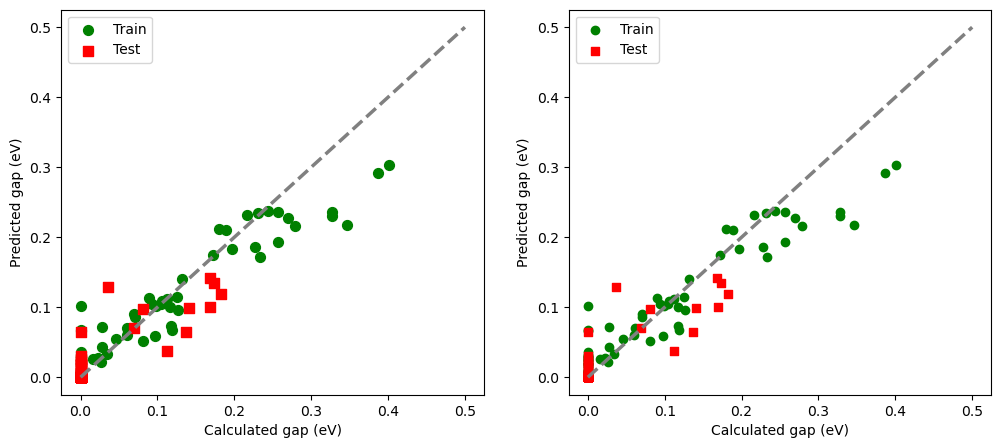

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.scatter(y_train_RF_eg['57'], pred_y_train_RF_eg,label='Train' ,marker='o',color='green',s=50)
ax1.scatter(y_test_RF_eg['57'], pred_y_test_RF_eg,label='Test',marker='s',color='red',s=50)
ax1.set_xlabel('Calculated gap (eV)')
ax1.set_ylabel('Predicted gap (eV)')
ax1.plot([0,0.5], [0,0.5],linewidth=2.5, color='gray', linestyle='dashed')
ax1.legend()

ax2.scatter(y_train_RF_eg['57'], pred_y_train_RF_eg,label='Train' ,marker='o',color='green')
ax2.scatter(y_test_RF_eg['57'], pred_y_test_RF_eg,label='Test',marker='s',color='red')
ax2.set_xlabel('Calculated gap (eV)')
ax2.set_ylabel('Predicted gap (eV)')
ax2.plot([0,0.5], [0,0.5],linewidth=2.5, color='gray', linestyle='dashed')
ax2.legend()

plt.show()

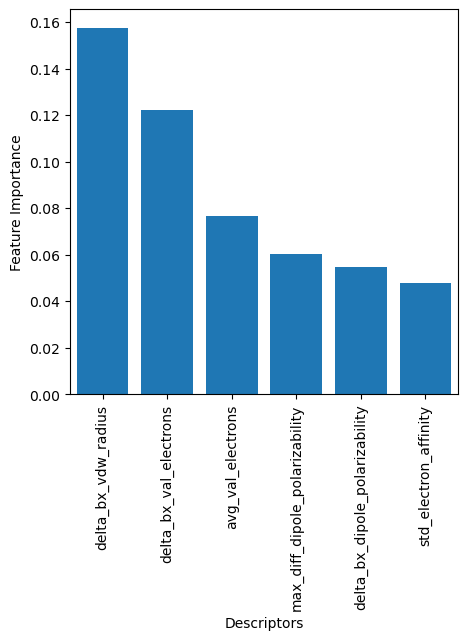

In [121]:
features_RF_eg = pd.read_csv('Results_Eg/feature_importance_eg_RF_hp_dnn.csv')
plt.figure(figsize=(5,5))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(6), features_RF_eg['importance'][:6], align='center')
plt.xticks(range(6), features_RF_eg['feature'][:6],  rotation=90)
plt.xlim([-0.5, 5.5])
plt.show()

In [13]:
## Lattice mismatch FFNN

In [12]:
y_train_ffnn_mismatch = pd.read_csv('Results_Mismatch/FFNN_from_plots/optuna_y_train_BEST_31.csv')
y_test_ffnn_mismatch = pd.read_csv('Results_Mismatch/FFNN_from_plots/optuna_y_test_BEST_31.csv')

pred_y_train_ffnn_mismatch = pd.read_csv('Results_Mismatch/FFNN_from_plots/optuna_y_pred_train_BEST_31.csv')
pred_y_test_ffnn_mismatch = pd.read_csv('Results_Mismatch/FFNN_from_plots/optuna_y_pred_test_BEST_31.csv')

In [13]:
print('R2 score of training set:',metrics.r2_score(y_train_ffnn_mismatch, pred_y_train_ffnn_mismatch))
print('R2 score of test set:',metrics.r2_score(y_test_ffnn_mismatch, pred_y_test_ffnn_mismatch))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_ffnn_mismatch, pred_y_train_ffnn_mismatch))
print('MAE of test set:',metrics.mean_absolute_error(y_test_ffnn_mismatch, pred_y_test_ffnn_mismatch))

R2 score of training set: 0.9788752305433706
R2 score of test set: 0.7685127404659843

MAE of training set: 0.18512607240948123
MAE of test set: 0.5529814209817296


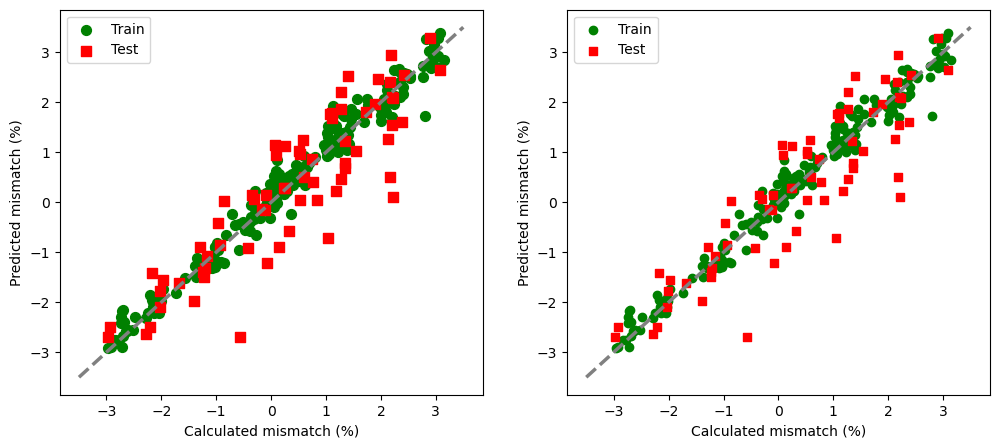

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.scatter(y_train_ffnn_mismatch, pred_y_train_ffnn_mismatch,label='Train' ,marker='o',color='green',s=50)
ax1.scatter(y_test_ffnn_mismatch, pred_y_test_ffnn_mismatch,label='Test',marker='s',color='red',s=50)
ax1.set_xlabel('Calculated mismatch (%)')
ax1.set_ylabel('Predicted mismatch (%)')
ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
ax1.legend()

ax2.scatter(y_train_ffnn_mismatch, pred_y_train_ffnn_mismatch,label='Train' ,marker='o',color='green')
ax2.scatter(y_test_ffnn_mismatch, pred_y_test_ffnn_mismatch,label='Test',marker='s',color='red')
ax2.set_xlabel('Calculated mismatch (%)')
ax2.set_ylabel('Predicted mismatch (%)')
ax2.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
ax2.legend()

plt.show()

In [24]:
y_train_XGB_mismatch = pd.read_excel('Results_Lattice_Mismatch/y_train_Optuna_be_rf_from_plots.xlsx')
y_test_XGB_mismatch = pd.read_excel('Results_Lattice_Mismatch/y_test_Optuna_be_rf_from_plots.xlsx')
pred_y_train_XGB_mismatch = pd.read_excel('Results_Lattice_Mismatch/y_pred_train_Optuna_be_rf_1_from_plots.xlsx')
pred_y_test_XGB_mismatch = pd.read_excel('Results_Lattice_Mismatch/y_pred_test_Optuna_be_rf_1_from_plots.xlsx')

In [25]:
print('R2 score of training set:',metrics.r2_score(y_train_XGB_mismatch, pred_y_train_XGB_mismatch))
print('R2 score of test set:',metrics.r2_score(y_test_XGB_mismatch, pred_y_test_XGB_mismatch))
print('\nMAE of training set:',metrics.mean_absolute_error(y_train_XGB_mismatch, pred_y_train_XGB_mismatch))
print('MAE of test set:',metrics.mean_absolute_error(y_test_XGB_mismatch, pred_y_test_XGB_mismatch))

R2 score of training set: 0.9583867550201576
R2 score of test set: 0.8001206099920052

MAE of training set: 0.2436109289378595
MAE of test set: 0.5682084456286196


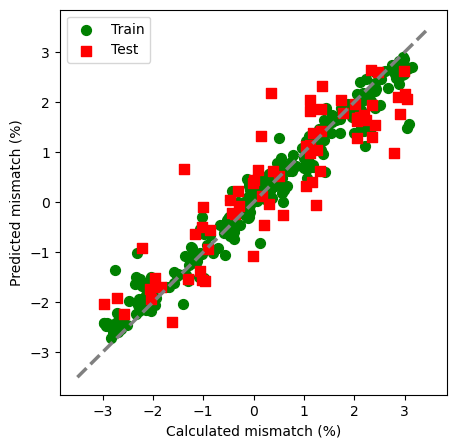

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_XGB_mismatch, pred_y_train_XGB_mismatch,label='Train' ,marker='o',color='green',s=50)
plt.scatter(y_test_XGB_mismatch, pred_y_test_XGB_mismatch,label='Test',marker='s',color='red',s=50)
plt.xlabel('Calculated mismatch (%)')
plt.ylabel('Predicted mismatch (%)')
plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()